In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
print(boston)


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

c:\Users\jaehong\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

In [4]:
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
print(bostonDF)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0  \
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [5]:
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기:', bostonDF.shape)
bostonDF

Boston 데이터셋 크기: (506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0  \
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

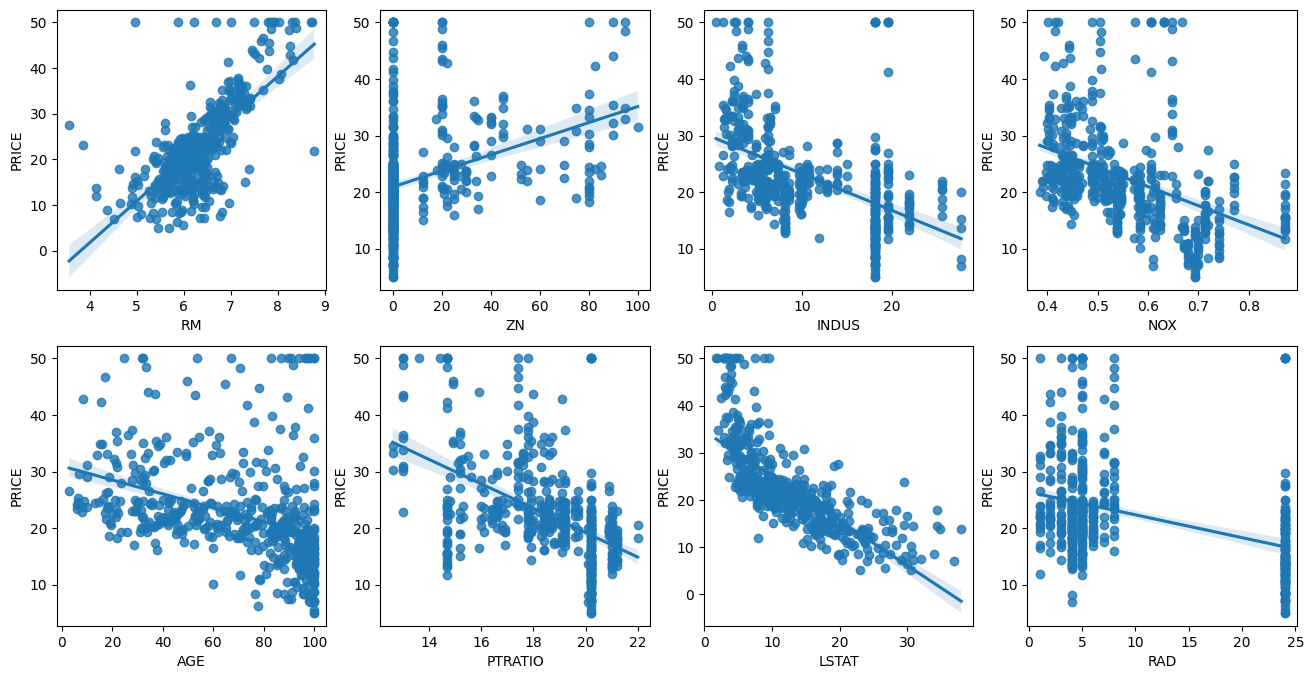

In [6]:
fig,axs = plt.subplots(figsize=(16,8), ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data= bostonDF,ax = axs[row][col])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,
                                                 random_state=156)

#linear Regression OLS(ordinary Least Square(OLS) method)
#error function을 gradient method로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  
rmse = np.sqrt(mse)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [8]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))


절편 값: 40.995595172164435
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [9]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### K-fold cross validation
K 겹 교차 검증(Cross validation)이란 통계학에서 모델을 "평가" 하는 한 가지 방법입니다. 소위 hold-out validation 이라 불리는 전체 데이터의 일부를 validation set 으로 사용해 모델 성능을 평가하는 것의 문제는 데이터셋의 크기가 작은 경우 테스트셋에 대한 성능 평가의 신뢰성이 떨어지게 된다는 것입니다. 만약 테스트셋을 어떻게 잡느냐에 따라 성능이 다르면, 우연의 효과로 인해 모델 평가 지표에 편향이 생기게 됩니다.



이를 해결하기 위해 K-겹 교차 검증은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다. 아래의 그림을 보면, 데이터를 5개로 쪼개 매번 테스트셋을 바꿔나가는 것을 볼 수 있습니다. 첫 번째 Iteration에서는 BCDE를 트레이닝 셋으로, A를 테스트셋으로 설정한 후, 성능을 평가합니다. 두 번째 Iteration에서는 ACDE를 트레이닝셋으로, B를 테스트셋으로하여 성능을 평가합니다. 그러면 총 5개의 성능 평가지표가 생기게 되는데, 보통 이 값들을 평균을 내어 모델의 성능을 평가하게 됩니다. (아래 데이터는 모두 사실은 트레이닝 데이터입니다. Iteration이라는 상황안에서만 테스트셋이 되는 것입니다.) 이 때, 데이터를 몇 개로 쪼갰느냐가 K-겹 교차검증의 K가 됩니다.

<figure>
    <img src='https://t1.daumcdn.net/cfile/tistory/990DD2465B72F1491E' width=500 height=300>
</figure>



출처: https://3months.tistory.com/321 [Deep Play]

- 우리는 과적합(overfitting)을 방지하는 것이 중요하다.
    - 과적합이란 train에서 성능이 좋고 Test에서 성능이 좋지 않는 것이다.
- 반대는 과소적합(underfitting)이라고 함.

In [10]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# K-Fold Cross validation
# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring ='neg_mean_squared_error')로 반환된 값은 모두 음수
#회귀의 값은 작아지면 좋으니깐 마이너스를 취하면 작으면 작아지는게 좋음
print('5 folds의 개별 negative MSE scores:',np.round(neg_mse_scores,2)) ## neg (네거티브 _ 마이너스뜻)
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 scores: {0:.3f}'.format(avg_rmse))

5 folds의 개별 negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 scores: 5.829


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('D:/류영표강사20230501/titanic/train.csv') # 주피터에서는 로컬로 읽어야 함. 경로 붙여넣기 하고, 백스래시를 슬래시로 변경해주어야 함
test = pd.read_csv('D:/류영표강사20230501/titanic/test.csv') # 주피터에서는 로컬로 읽어야 함. 경로 붙여넣기 하고, 백스래시를 슬래시로 변경해주어야 함
train
# test

PassengerId  Survived  Pclass   
0              1         0       3  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp   
0                              Braund, Mr. Owen Harris    male  22.0      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# 탐색적 자료 분석(Exploratory Data Analysis(EDA))


 - survived : 생존=1, 죽음=0
 - pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
 - sibsp : 함께 탑승한 형제 또는 배우자 수
 - parch : 함께 탑승한 부모 또는 자녀 수
 - ticket : 티켓 번호
 - cabin : 선실 번호
 - embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown


In [12]:
train.head()

PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [13]:
train.tail()

PassengerId  Survived  Pclass                                      Name   
886          887         0       2                     Montvila, Rev. Juozas  \
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [14]:
print(train.shape,test.shape)

(891, 12) (418, 11)


In [15]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp   
count   891.000000  891.000000  891.000000  714.000000  891.000000  \
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [16]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
train[train['Survived'] == 1]['Sex']

1      female
2      female
3      female
8      female
9      female
        ...  
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 342, dtype: object

In [19]:
train[train['Survived'] == 1]['Sex'].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

In [20]:
def bar_chart(feature):
  survived = train[train['Survived'] ==1][feature].value_counts() # 생존자를 카운트
  dead = train[train['Survived'] ==0][feature].value_counts() #사망자를 카운트
  df = pd.DataFrame([survived,dead]) #[생존자,사망자]를 dataFrame
  df.index = ['Survived','Dead'] # index화
  df.plot(kind = 'bar',stacked = True, figsize = (10,5)) #그림을 그림

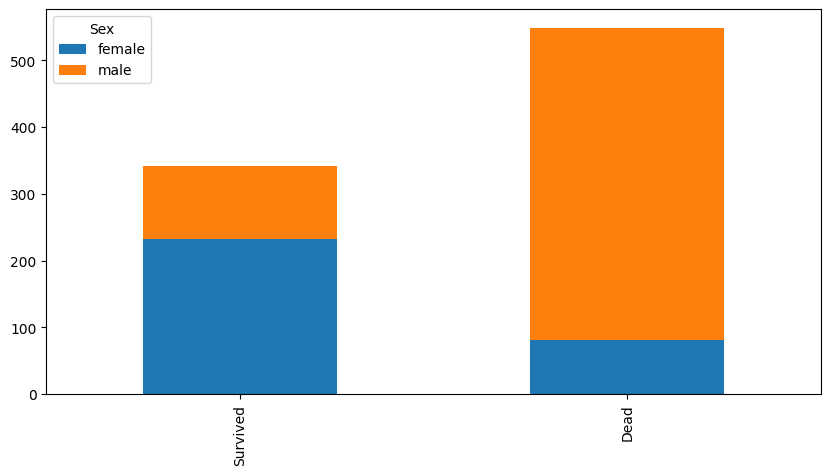

In [21]:
bar_chart('Sex') #무슨 이유로 남성분들이 사망을 하셨을까?

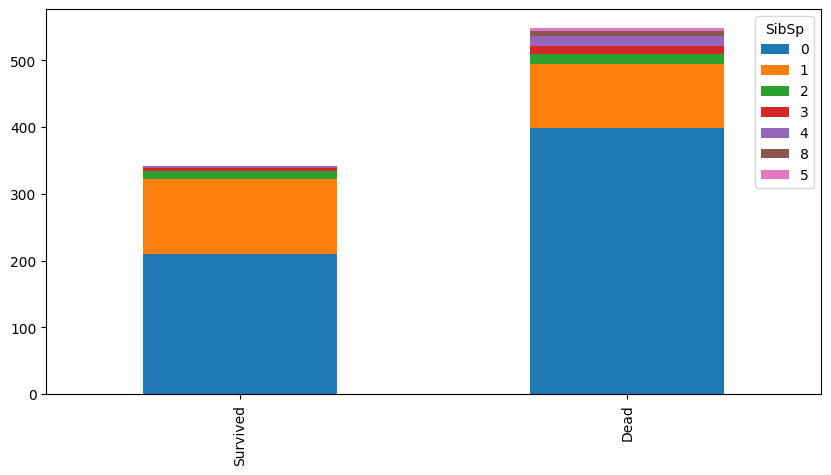

In [22]:
bar_chart('SibSp') #함께 탑승한 형제 또는 배우자 수에 따라서 생존이 왜 다를까?

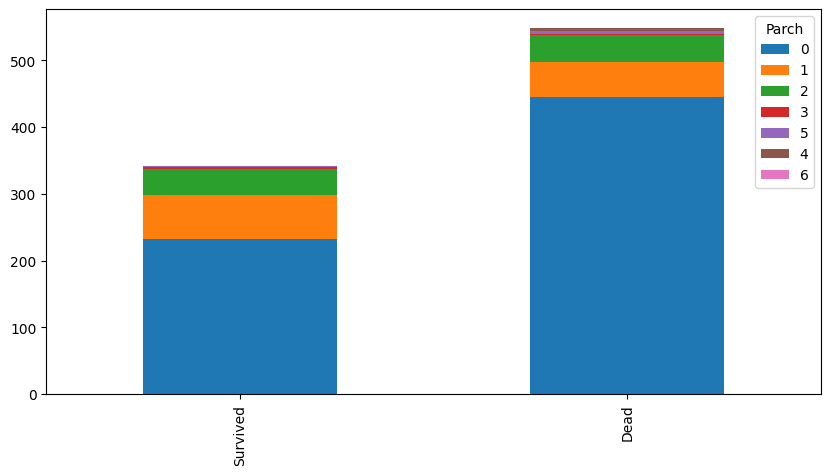

In [23]:
bar_chart('Parch') #함께 탑승한 부모 또는 자녀 수

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

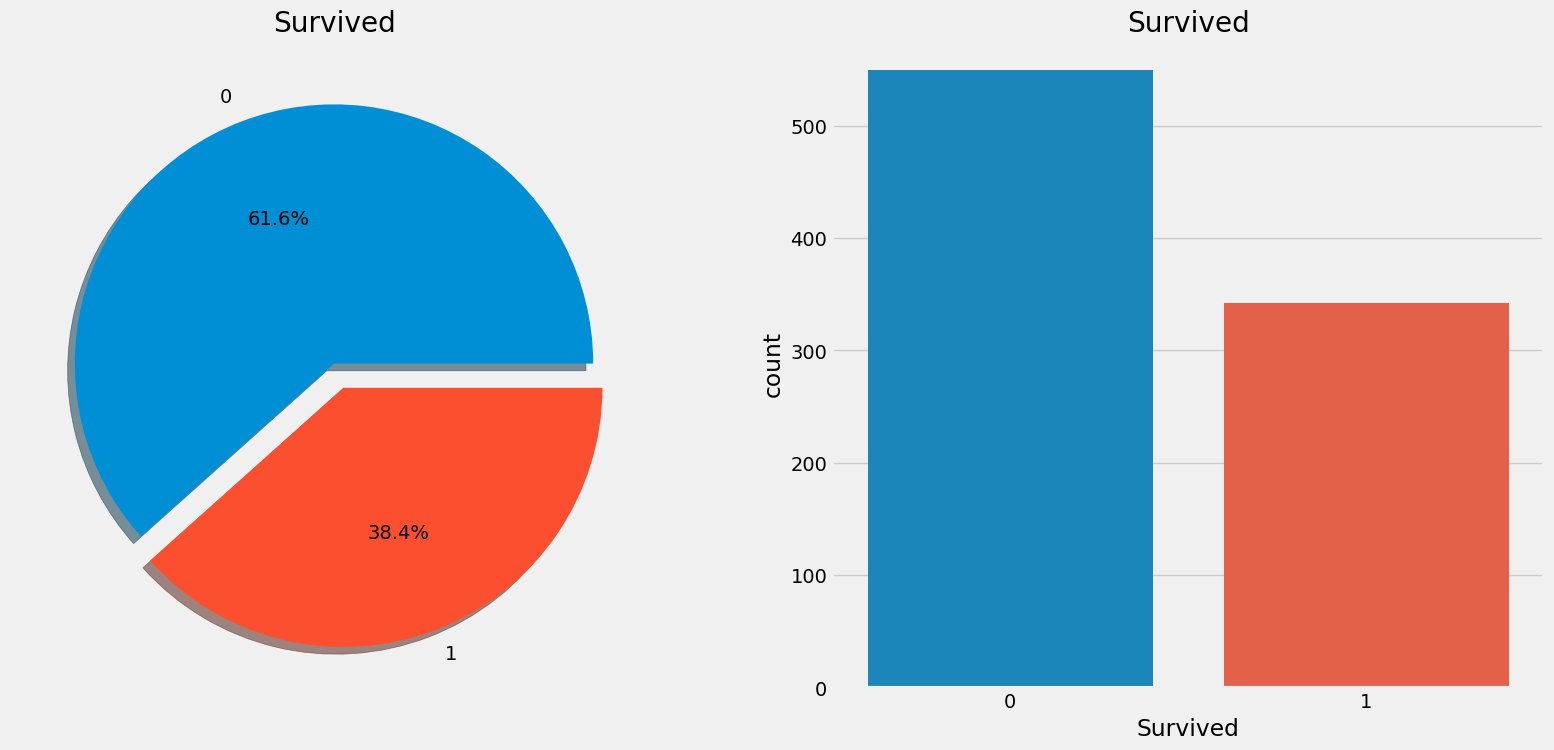

In [25]:
f,ax = plt.subplots(1,2, figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
#exploed : 각 항목을 파이의 원점에서 튀어나오는 정도를 나타냄
#autopct : 각 항목의 퍼센트를 표시함.
#shadow : 그림자를 그릴 것 인지?
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x=train['Survived'],ax = ax[1])
ax[1].set_title('Survived')
plt.show()

# Pclass

In [26]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

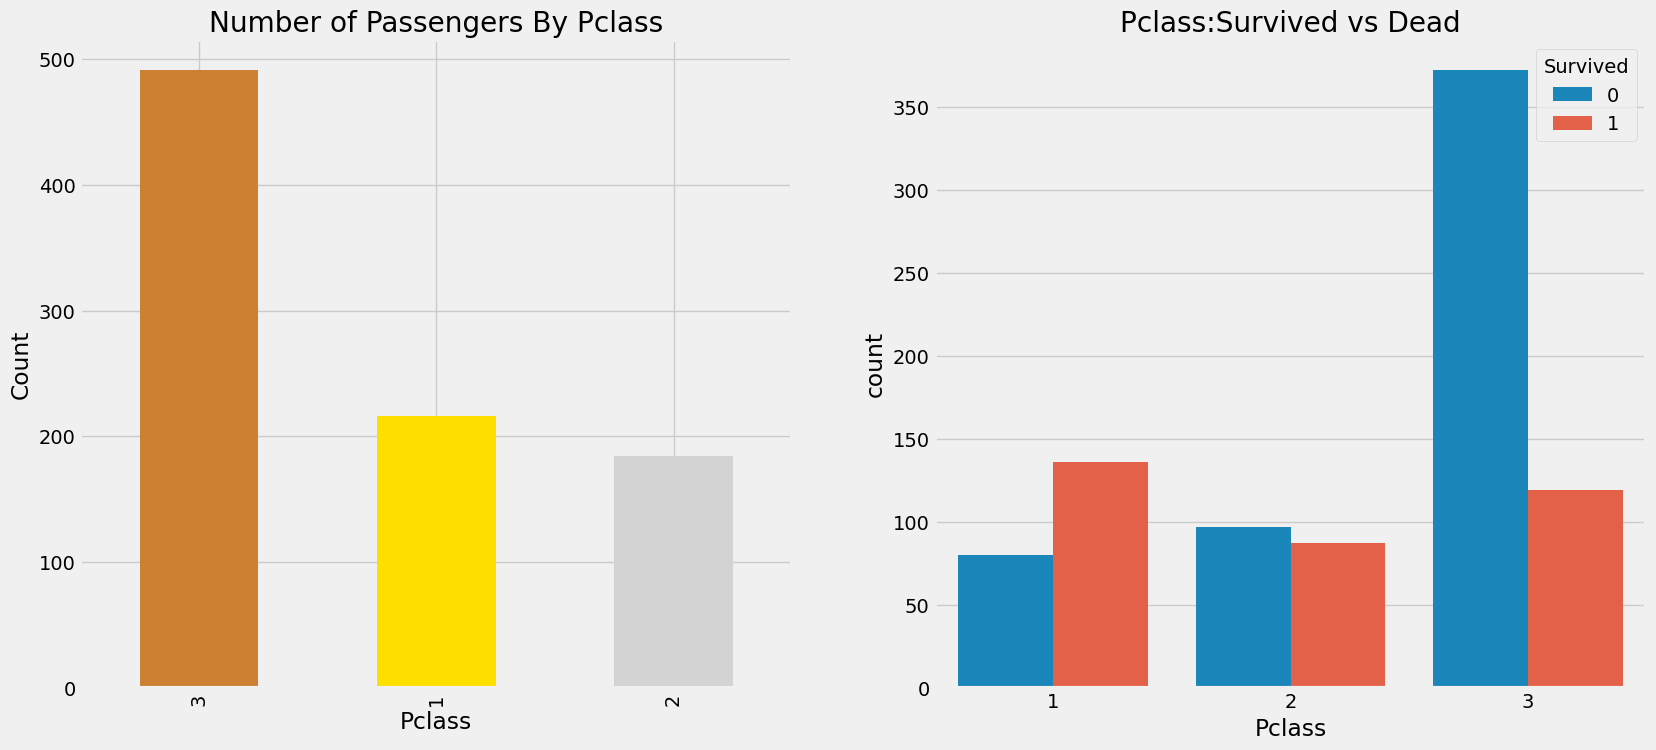

In [27]:
f,ax = plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data = train, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [28]:
pd.crosstab(train.Sex, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

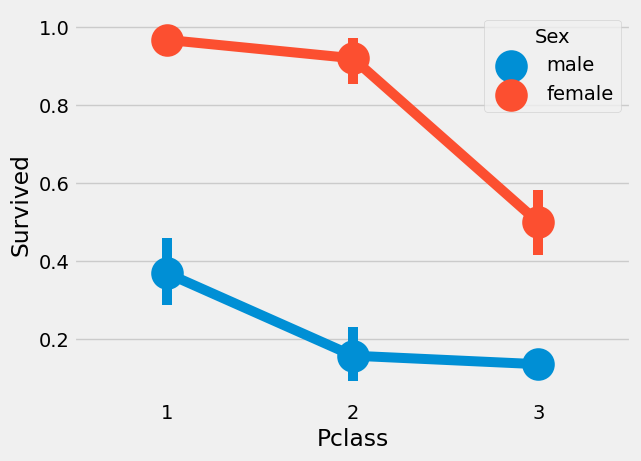

In [29]:
sns.pointplot(x='Pclass',y='Survived',hue='Sex',data = train)
plt.show()

In [30]:
print('Oldest Passeneger was of :', train['Age'].max(), 'Years')
print('Youngest Passeneger was of :', train['Age'].min(), 'Years')
print('Average Age on the ship :', train['Age'].mean(), 'Years') #평균
print('Median Age on the ship :', train['Age'].median(), 'Years') #중위수(중앙값)
print('Mode Age on the ship :', train['Age'].mode(), 'Years') #최빈값

Oldest Passeneger was of : 80.0 Years
Youngest Passeneger was of : 0.42 Years
Average Age on the ship : 29.69911764705882 Years
Median Age on the ship : 28.0 Years
Mode Age on the ship : 0    24.0
Name: Age, dtype: float64 Years


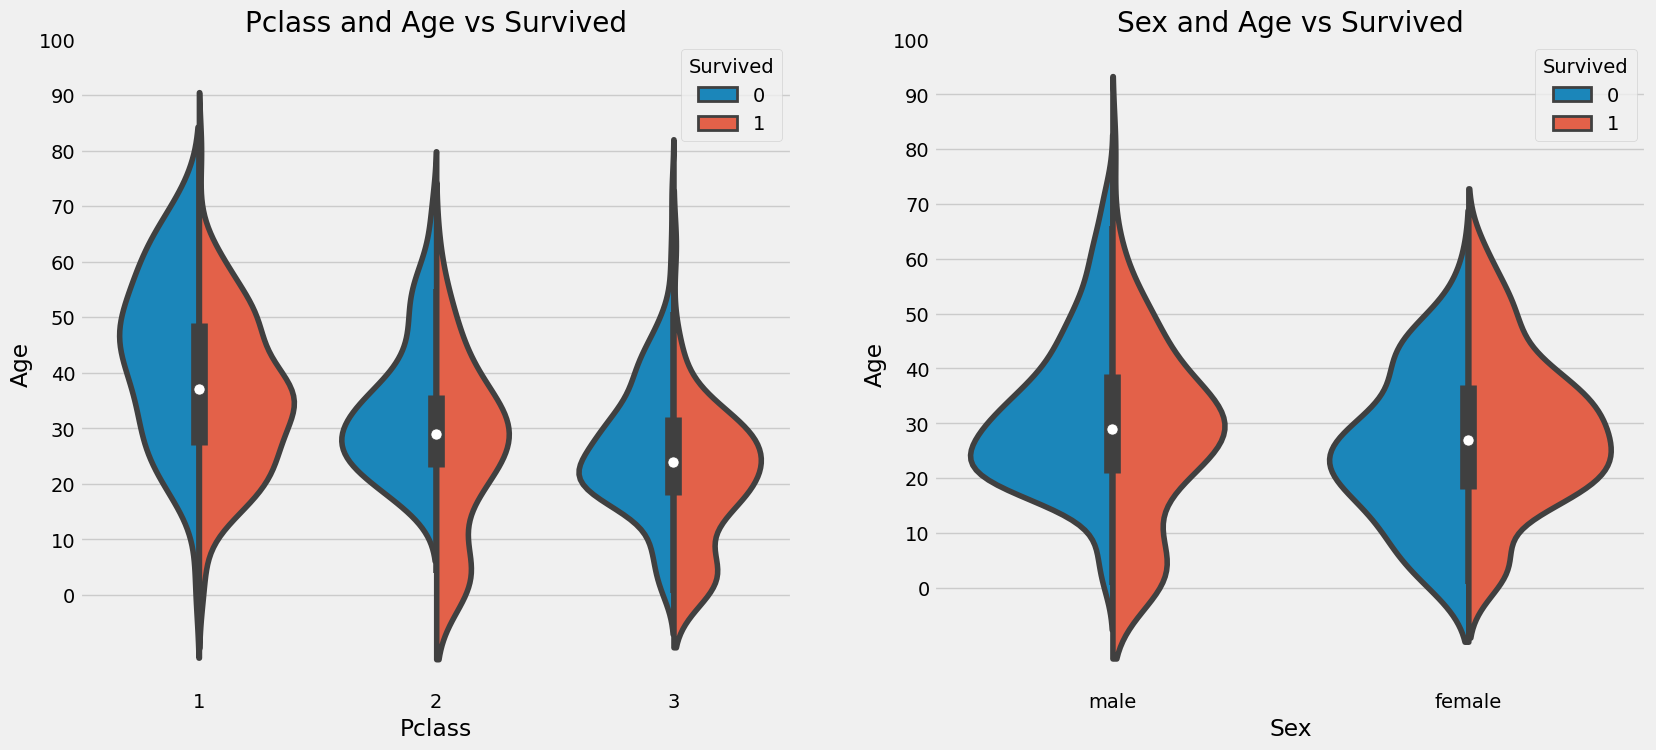

In [31]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass',y ='Age',hue='Survived',data = train, split = True,ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex',y='Age', hue='Survived',data = train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [34]:
train['Name'].str

In [35]:
train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
#[A-Za-z]+)\. : 정규표현식(regular expression)
# -> 규칙 : 대문자나 소문자로 시작하다가 .으로 끝나면 추출해주세요.

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [36]:
train_test_data = [train,test]
#Name에 따라서 뭐가 다른가?  -> 전에 각각 해당하는 value를 count를 함.
for dataset in train_test_data:
    dataset['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
#extract('([A-Za-z]+)\. ->정규표현식
# A-Z와 a-Z를 찾아서 어느지점에서 끝내는가? .을 기준으로 해서 자르라는 이야기 그 다음에 count

In [37]:
train['Title'].value_counts() 

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

# expand 설명

In [38]:
import numpy as np
import pandas as pd

s2 = pd.Series(['a_b_c','c_d_e', np.nan,'f_g_h'], dtype='string')
s2

0    a_b_c
1    c_d_e
2     <NA>
3    f_g_h
dtype: string

In [39]:
s2.str.split('_')

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

방금 저장된 리스트 중에서 몇번째를 추출할 것인지를 정하려면, get 또는 []를 사용해서 지정할 수 있다. get()이나 []이나 결과는 같음.

In [40]:
s2.str.split('_').get(1)

['c', 'd', 'e']

In [41]:
s2.str.split('_')[1]

['c', 'd', 'e']

In [42]:
s2.str.split('_',expand=True) # 데이터프레임 형식으로 확장되었음.

0     1     2
0     a     b     c
1     c     d     e
2  <NA>  <NA>  <NA>
3     f     g     h

In [43]:
s2.str.split('_',expand=False) # 데이터프레임 형식으로 확장되었음.

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

원본 Series에 StringDtype이 있으면 출력 열도 모두 StringDtype이 됨.
n에 원하는 갯수를 입력하여 분할하고자 하는 수를 제한할 수도 있다.

In [44]:
s2.str.split('_',expand=True,n=1) # 데이터프레임 형식으로 확장되었음.

0     1
0     a   b_c
1     c   d_e
2  <NA>  <NA>
3     f   g_h

In [45]:
s2.str.split('_',expand=True,n=1) # 데이터프레임 형식으로 확장되었음.

0     1
0     a   b_c
1     c   d_e
2  <NA>  <NA>
3     f   g_h

one-hot encoding

In [46]:
#극단적으로 나눔.
title_mapping = {'Mr':0, "Miss":1, 'Mrs':2,'Master':3,
                 'Dr':3,'Rev':3,'Col':3,'Major':3,'Mlle':3,'Ms':3,'Sir':3,'Don':3,'Countess':3,
                 'Capt':3,'Lady':3,'Jonkheer':3,'Mme':3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping) #모든 피쳐에 적용해주세요.

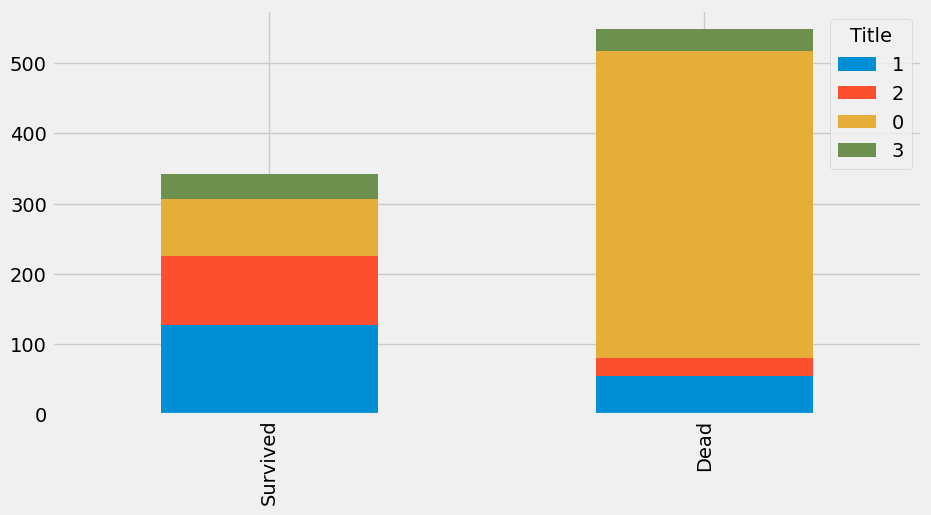

In [47]:
bar_chart('Title')

In [48]:
sex_mapping = {'male':0,'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
#method : sklearn.preprocessing import OneHotEncoder, pandas의 get_dummies

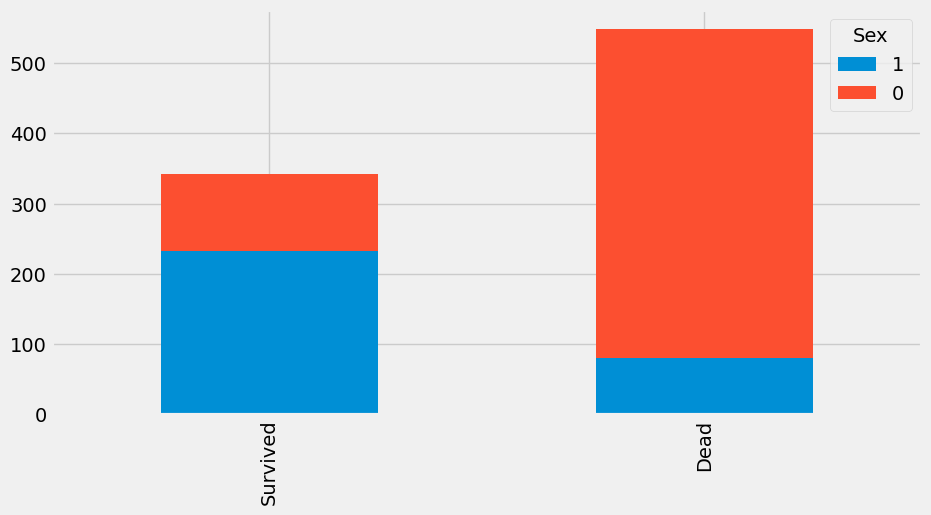

In [49]:
bar_chart('Sex')

In [50]:
pd.crosstab(train['Title'],train['Sex'])

Sex      0    1
Title          
0      517    0
1        0  182
2        0  125
3       60    7

- 결측치 처리

In [51]:
#missing Age를 각 Title에 대한 연령의 중간값으로 채움(Mr,Mrs,Miss,others) inplace 는 채울꺼냐?
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
#train에 결측치 처리를 하였다면, test에도 똑같이 처리를 해야됨.
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

In [52]:
train['Age'].isna().sum() #결측치 처리 하고 꼭 다시 확인할 것.

0

In [53]:
train[['Title','Age']].groupby(['Title'], as_index = False).mean()

Title        Age
0      0  31.823017
1      1  21.620879
2      2  35.776000
3      3  19.577164

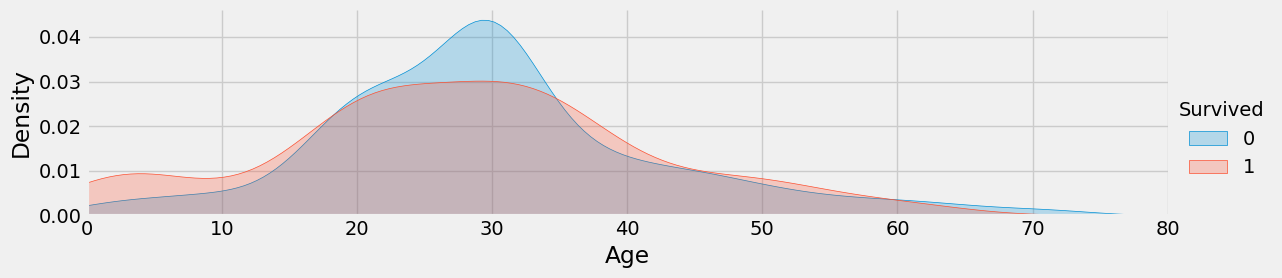

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

#변수의 분포를 시각화하거나, 여러 변수들 사이의 상관관계를 여러개의 그래프로 쪼개서 표현할때 유용함
# FeactGrid는 Colum,row, hue를 통한 의미구분을 통해 총 3차원까지 구현이 가능함.
#aspect : subplot의 세로 대비 가로의 비율.
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()
#20-30대에 사망률 > 생존률이 높다 왜 그럴까?


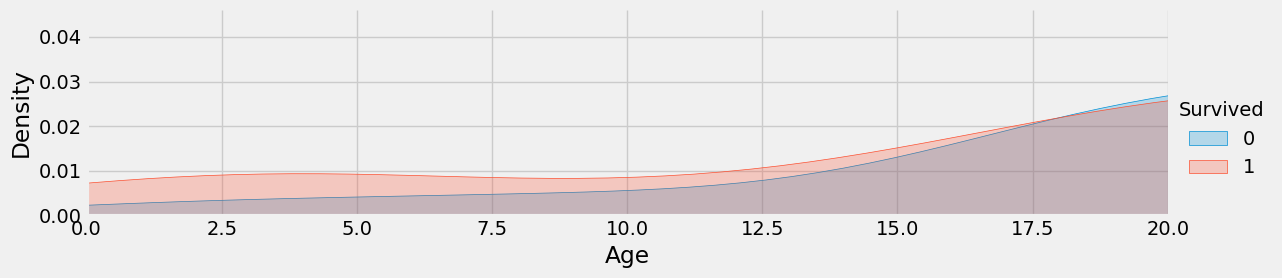

In [55]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.xlim(0,20)   # <---- 자름

plt.show()
#0-20까지 나이로 자름.

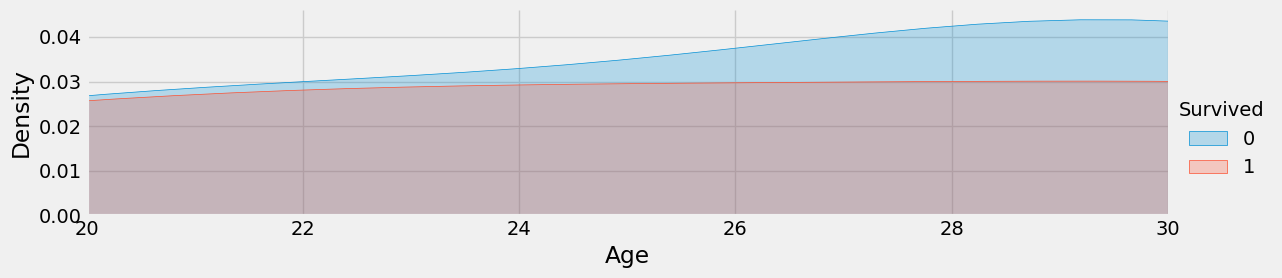

In [56]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.xlim(20,30)   # <---- 자름

plt.show()
#20에서 30까지 나이로 자름.

- 0~80세까지 들어있음. 너무 많다. Pandas ->Binning 기술을 씀 (연속형 변수를 특정한 구간으로 잘라서 범주형으로 만들어주는 기술)

- 잇달아 일어나는 형태의 데이터는 많은 정보를 주지 못하므로 이럴땐 각각 하나의 카테고리에 나이를 담아 정보를 보다 명확하게 확인할 수 있는 방법

In [57]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age']=0,   # <--- 콤마때문에 에러가 남
    dataset.loc[ (dataset['Age'] >16) and (dataset['Age']<=26),'Age']=1

ValueError: Must have equal len keys and value when setting with an iterable

#컴마로 연결을 해버리니깐, multi index로 받아들여서 동시에 처리가 안됨

In [58]:
for dataset in train_test_data: 
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0 
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1 
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2 
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3 
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
  dataset['Age'] = dataset['Age'].map( { 0: 'Child', 1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

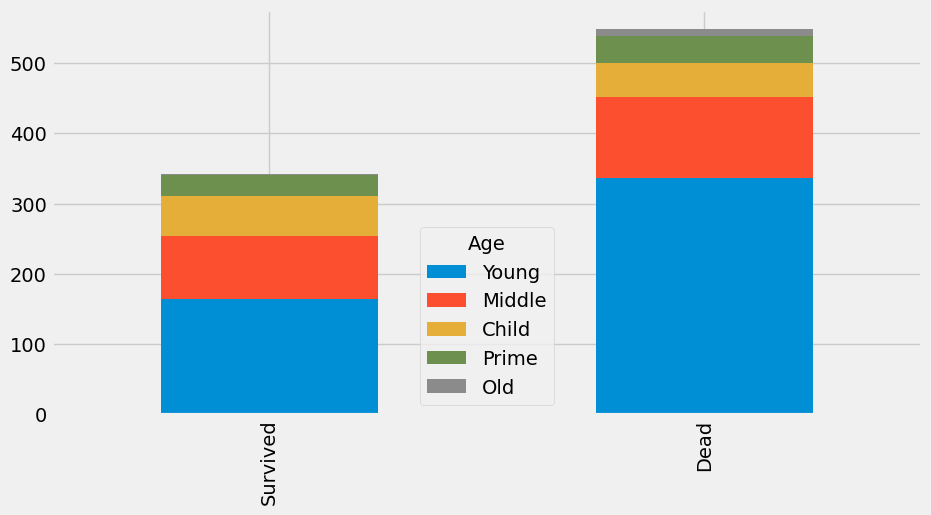

In [59]:
bar_chart('Age')

- FamilySize
    - 함께 동승한 부모님과 아이들의 수와 형제와 배우자의 수.
    - 혼자탄거랑 가족들이랑 탄거랑 어떻게 다를까?
    - SibSp+Parch

In [60]:
train['FamilySize'] = train['SibSp']+train['Parch']+1
test['FamilySize'] = test['SibSp']+test['Parch']+1
#솔로일 가능성이 있기 때문에 1을 더해줌. 왜냐하면 파이썬은 0부터 숫자를 세기 때문에

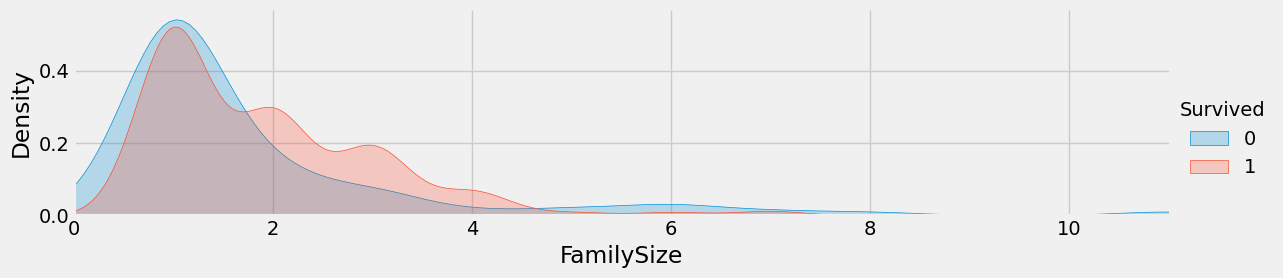

In [61]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

plt.show()

- 혼자일 경우는 사망률, 생존률이 높음.

In [62]:
X_train = train.drop(['Survived','PassengerId'],axis=1)
y_train = train['Survived']
X_test = test.drop('PassengerId',axis=1).copy()

In [63]:
X_train # drop된 것을 확인하세요.

Pclass                                               Name  Sex     Age   
0         3                            Braund, Mr. Owen Harris    0   Young  \
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  Middle   
2         3                             Heikkinen, Miss. Laina    1   Young   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  Middle   
4         3                           Allen, Mr. William Henry    0  Middle   
..      ...                                                ...  ...     ...   
886       2                              Montvila, Rev. Juozas    0   Young   
887       1                       Graham, Miss. Margaret Edith    1   Young   
888       3           Johnston, Miss. Catherine Helen "Carrie"    1   Young   
889       1                              Behr, Mr. Karl Howell    0   Young   
890       3                                Dooley, Mr. Patrick    0   Young   

     SibSp  Parch            Ticket     Fare Cabin Embarked  Title  FamilySize  
0        1      0         A/5 21171   7.2500   NaN        S      0           2  
1        1      0          PC 17599  71.2833   C85        C      2           2  
2        0      0  STON/O2. 3101282   7.9250   NaN        S      1           1  
3        1      0            113803  53.1000  C123        S      2           2  
4        0      0            373450   8.0500   NaN        S      0           1  
..     ...    ...               ...      ...   ...      ...    ...         ...  
886      0      0            211536  13.0000   NaN        S      3           1  
887      0      0            112053  30.0000   B42        S      1           1  
888      1      2        W./C. 6607  23.4500   NaN        S      1           4  
889      0      0            111369  30.0000  C148        C      0           1  
890      0      0            370376   7.7500   NaN        Q      0           1  

[891 rows x 12 columns]

In [64]:
X_test.isna().sum()

Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin         327
Embarked        0
Title           0
FamilySize      0
dtype: int64

In [65]:
X_test['Fare'].fillna(0,inplace=True)

In [66]:
#원핫인코딩이 힘들어서 우선 포기.
X_train.drop('Name',axis=1, inplace=True)
X_test.drop('Name',axis=1, inplace=True)

In [67]:
#원핫인코딩이 힘들어서 우선 포기.
X_train.drop('Ticket',axis=1, inplace=True)
X_test.drop('Ticket',axis=1, inplace=True)

In [68]:
#원핫인코딩이 힘들어서 우선 포기.
X_train.drop('Cabin',axis=1, inplace=True)
X_test.drop('Cabin',axis=1, inplace=True)

In [69]:
#원핫인코딩이 힘들어서 우선 포기.
X_train.drop('Age',axis=1, inplace=True)
X_test.drop('Age',axis=1, inplace=True)

In [70]:
#원핫인코딩이 힘들어서 우선 포기.
X_train.drop('Title',axis=1, inplace=True)
X_test.drop('Title',axis=1, inplace=True)

In [71]:
#원핫인코딩이 힘들어서 우선 포기.
X_train.drop('Embarked',axis=1, inplace=True)
X_test.drop('Embarked',axis=1, inplace=True)

In [72]:
from sklearn.linear_model import LinearRegression
#데이터가 정렬되어 있을 경우도 있기 때문에 데이터를 shuffle 해줌.
from sklearn.utils import shuffle

lig_reg = LinearRegression()
lig_reg.fit(X_train,y_train)

lig_reg.score(X_train,y_train)

0.3744982348875002

In [73]:
y_pred = lig_reg.predict(X_test)

df1 = pd.DataFrame(y_pred)
df1

0
0    0.113353
1    0.606261
2    0.251976
3    0.113756
4    0.596279
..        ...
413  0.113460
414  0.963713
415  0.113073
416  0.113460
417  0.075115

[418 rows x 1 columns]

# 당뇨병 예측하기

In [74]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

age : 나이
sex : 성별
bmi : 체질량지수
bp: 평균혈압
s1 : 혈중 총콜레스테롤
s2 : 저밀도 지질단백질
s3 : 고밀도 지질단백질
s4 : 총 콜레스테롤 수치
s5 : 혈중트리글리세이드 수치
s6 : 혈당수치

In [75]:
diabetes = load_diabetes()

In [76]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [77]:
diabetes.data.shape,diabetes.target.shape

((442, 10), (442,))

In [78]:
print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [79]:
print(type(diabetes))

<class 'sklearn.utils.Bunch'>


In [80]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

- input data 보기

In [81]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

- output data 보기

In [82]:
diabetes.target[0:3]

array([151.,  75., 141.])

- 당뇨병 환자 데이터 시각화 하기

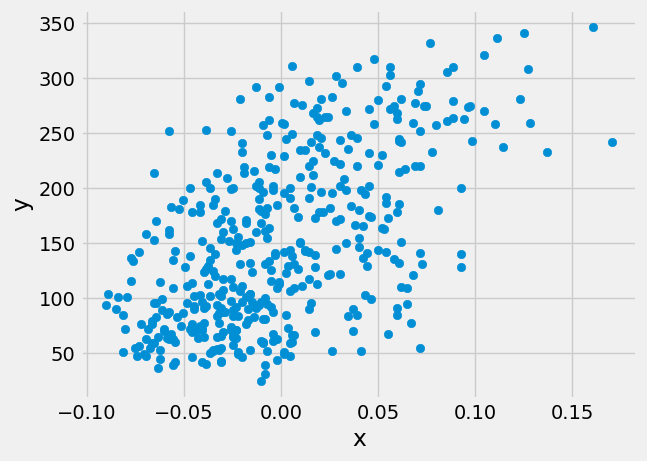

In [83]:
plt.scatter(diabetes.data[:,2],diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [84]:
df = pd.DataFrame(diabetes.data, columns = diabetes['feature_names'])
df['target'] = diabetes.target
df.head()

age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

In [85]:
df.describe()

age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -3.639623e-16  1.309912e-16 -8.013951e-16  1.289818e-16 -9.042540e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   1.301121e-16 -4.563971e-16  3.863174e-16 -3.848103e-16 -3.398488e-16   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260974e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324879e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947634e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243323e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335990e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [87]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

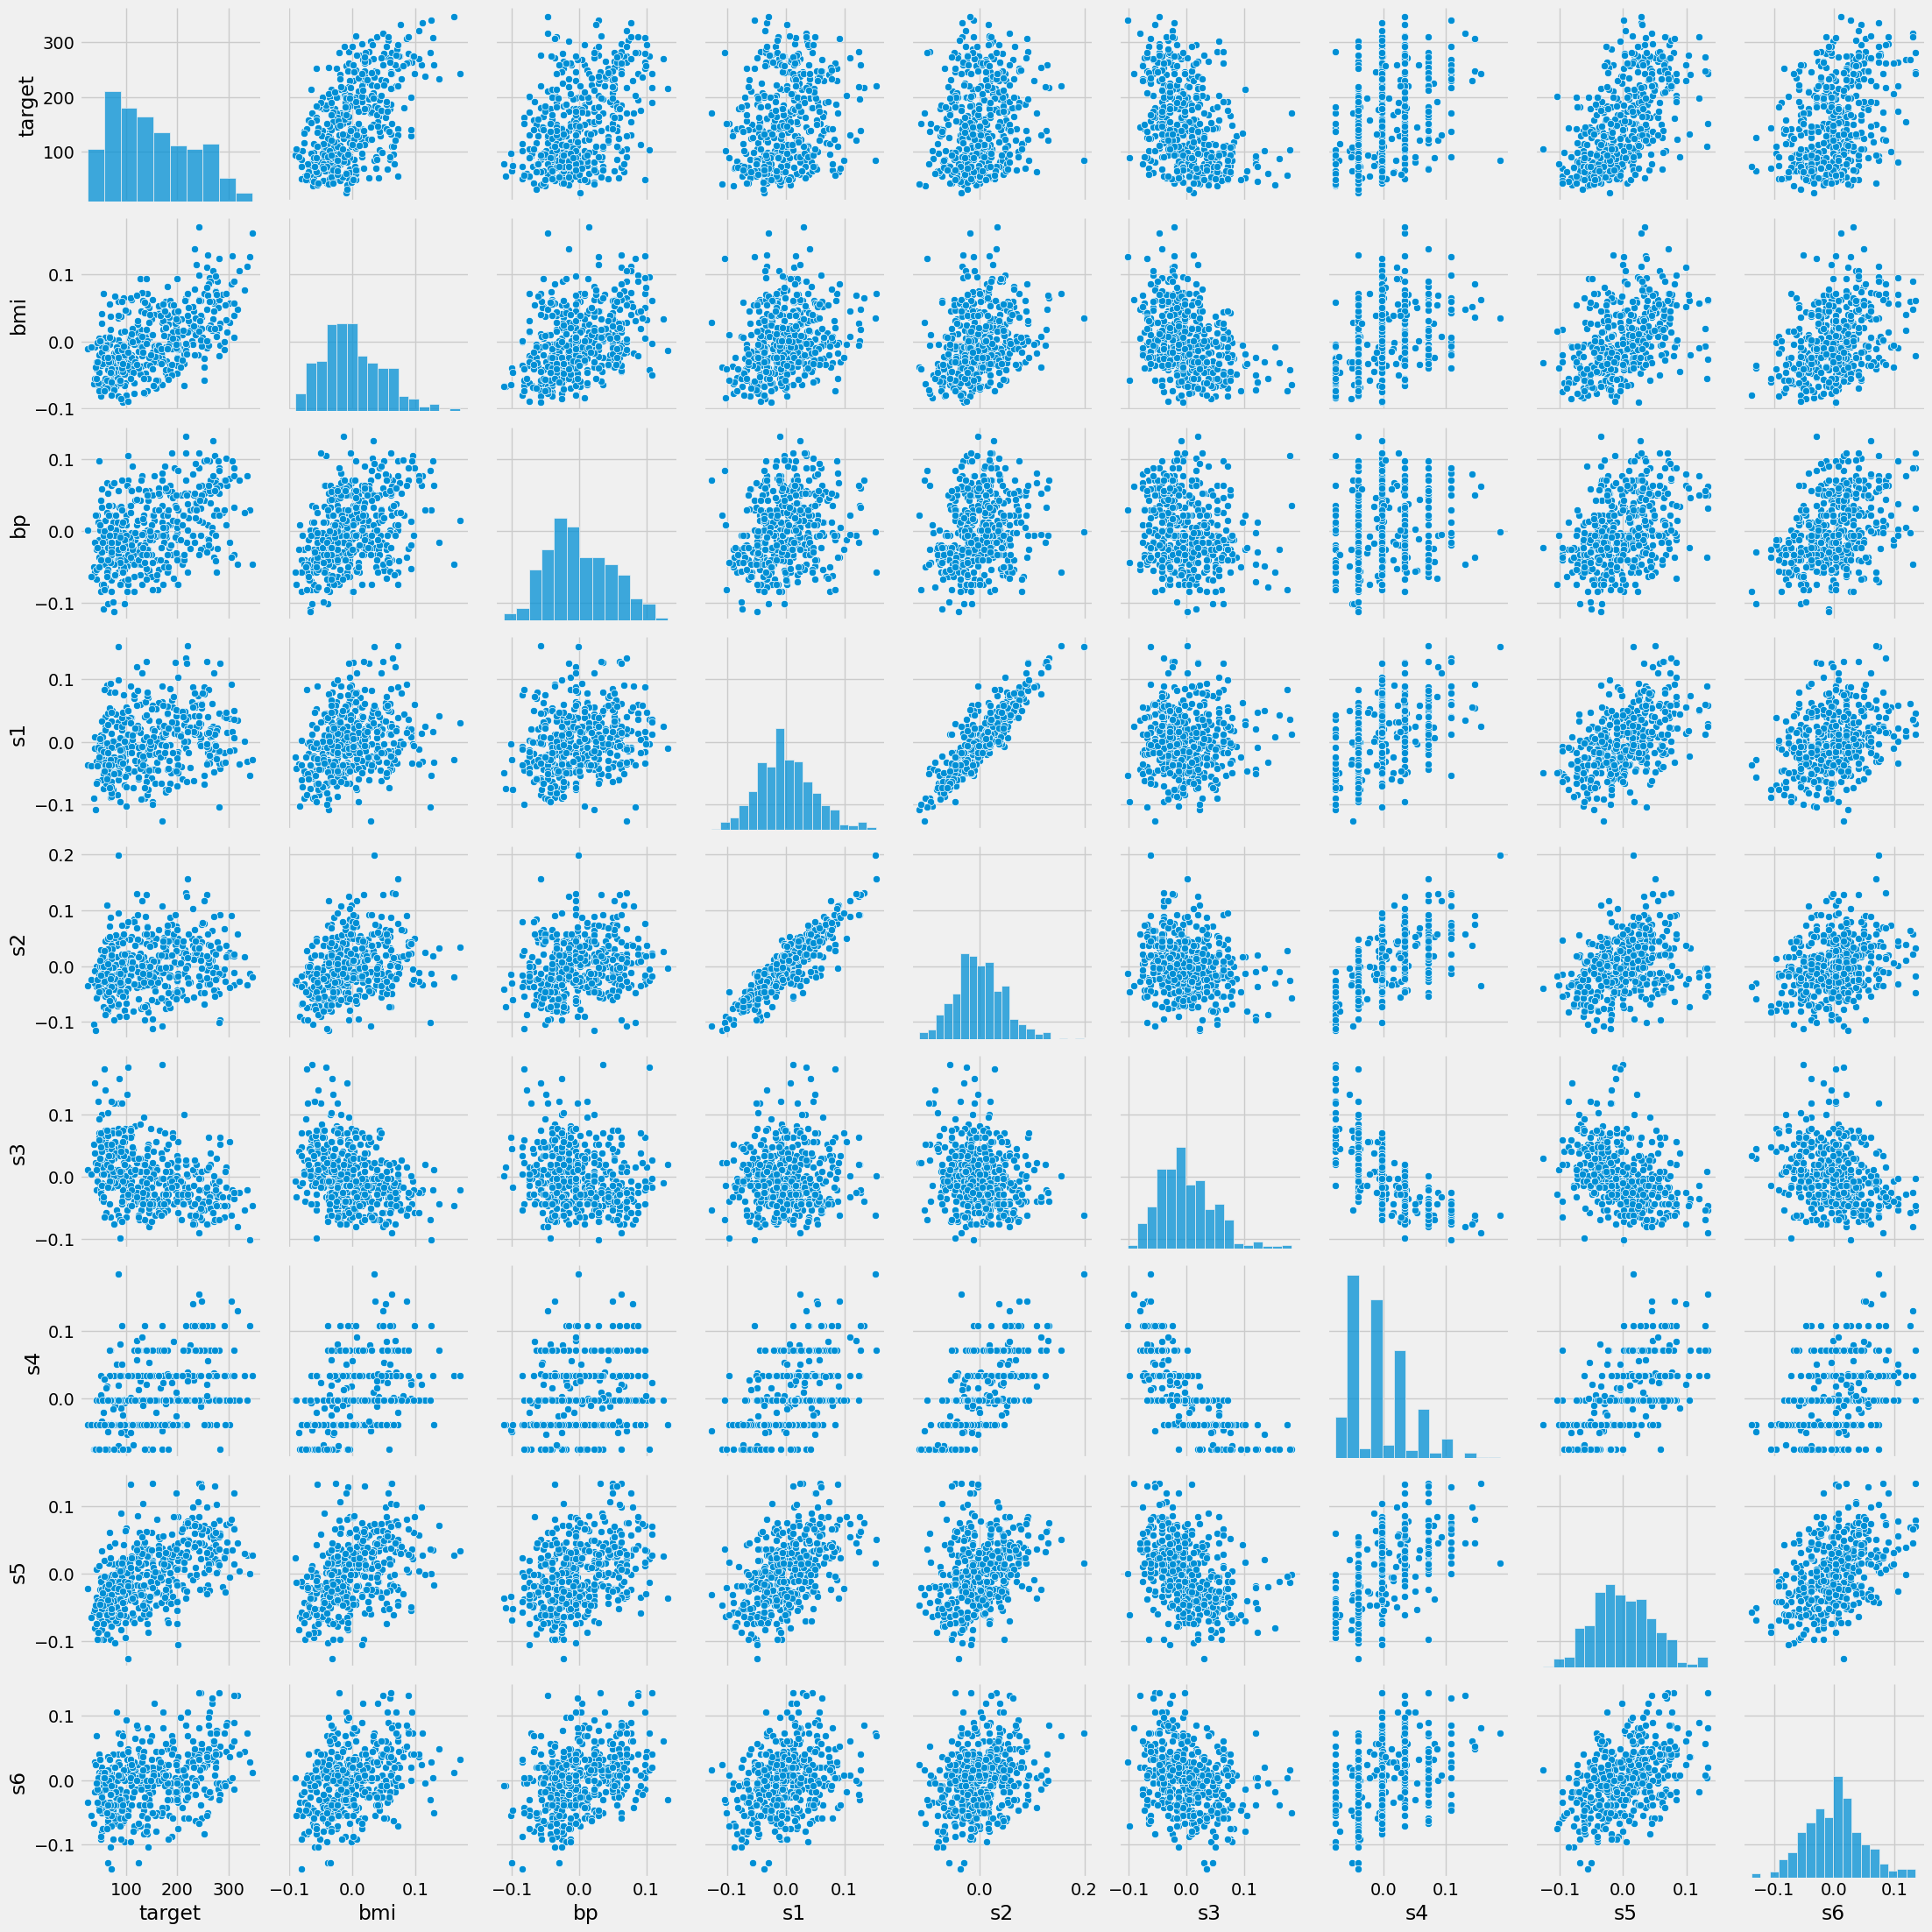

In [88]:
sns.pairplot(df[['target','bmi','bp','s1','s2','s3','s4','s5','s6']])

In [89]:
df_corr = df.corr()
df_corr

age       sex       bmi        bp        s1        s2        s3   
age     1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181  \
sex     0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
bp      0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
s1      0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
s5      0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
s6      0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054 -0.394789   

              s4        s5        s6    target  
age     0.203841  0.270777  0.301731  0.187889  
sex     0.332115  0.149918  0.208133  0.043062  
bmi     0.413807  0.446159  0.388680  0.586450  
bp      0.257653  0.393478  0.390429  0.441484  
s1      0.542207  0.515501  0.325717  0.212022  
s2      0.659817  0.318353  0.290600  0.174054  
s3     -0.738493 -0.398577 -0.273697 -0.394789  
s4      1.000000  0.617857  0.417212  0.430453  
s5      0.617857  1.000000  0.464670  0.565883  
s6      0.417212  0.464670  1.000000  0.382483  
target  0.430453  0.565883  0.382483  1.000000

In [90]:
cor_order = df_corr.loc[:'s6','target'].abs().sort_values(ascending = False)
cor_order

bmi    0.586450
s5     0.565883
bp     0.441484
s4     0.430453
s3     0.394789
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: target, dtype: float64

- 상관계수가 0.5를 넘은 bmi와 s5를 대상으로 산점도와 회귀선을 그려보자.


In [91]:
names = ['target', 'bmi', 's5']
diabetes_df = df.loc[:,names]

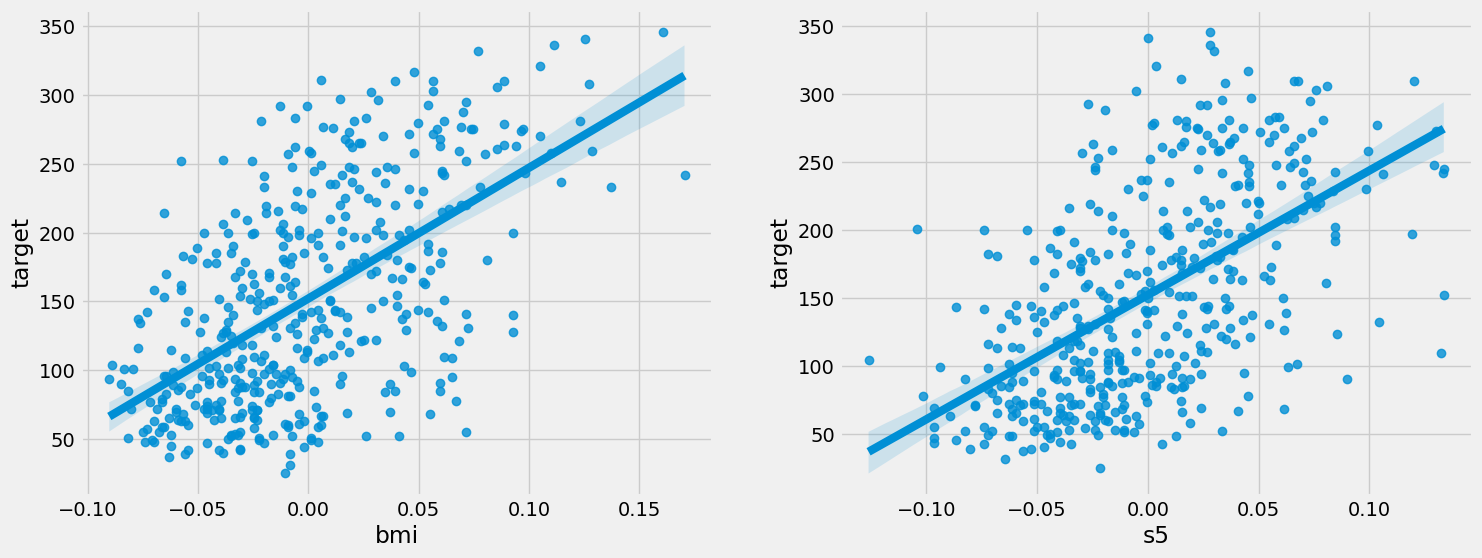

In [92]:
plt.figure(figsize = (16,6))
for i,name in enumerate(names[1:]):
  ax = plt.subplot(1,2,i+1)
  sns.regplot(x=name,y=names[0],data=diabetes_df,ax=ax)
plt.show()

In [93]:
from sklearn.model_selection import train_test_split

x_data=diabetes_df.loc[:, ['bmi', 's5']]
y_data=diabetes_df.loc[:, 'target']

X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [94]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 2) (353,)
(89, 2) (89,)


In [95]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train,y_train)

0.4741054934306861

In [96]:
print(np.round(lr.coef_, 2))
print(np.round(lr.intercept_, 2))

[696.73 604.62]
151.73


In [97]:
pred = lr.predict(X_test)

- bmi prediction

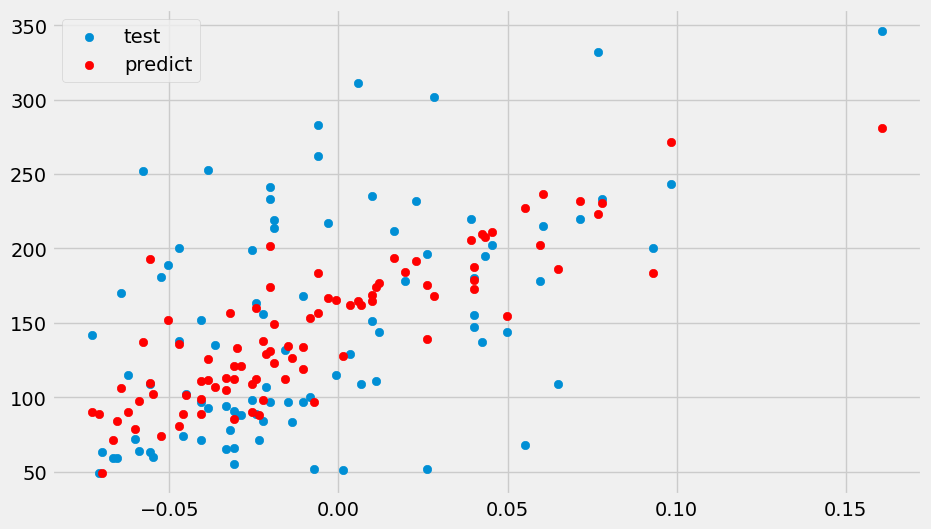

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['bmi'], y_test, label='test')  
plt.scatter(X_test['bmi'], pred, c='r', label='predict')  
plt.legend() 
plt.show()

- s5 prediction

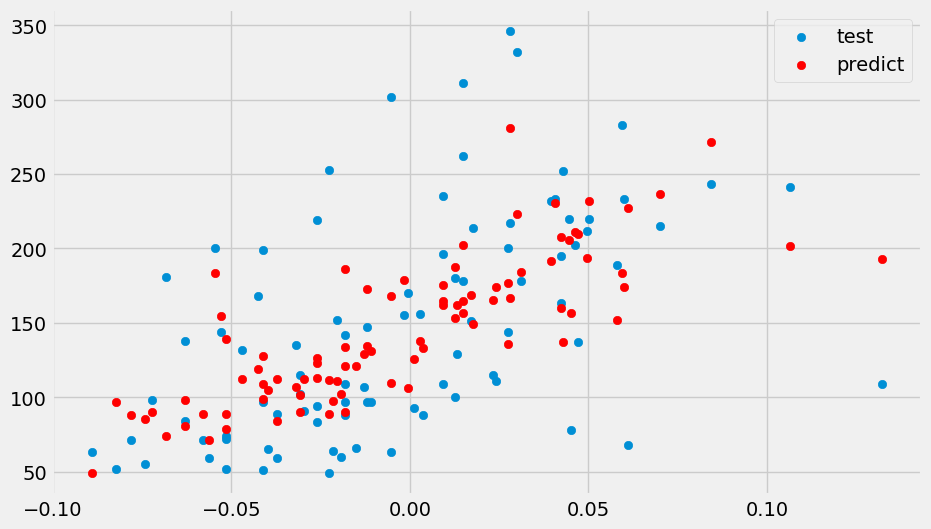

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['s5'], y_test, label='test')  
plt.scatter(X_test['s5'], pred, c='r', label='predict')  
plt.legend() 
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error

test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred) 
test_mse = mean_squared_error(y_test, test_pred)

In [102]:
print("train data set RMSE :", round(train_mse**0.5, 3))
print("test data set RMSE :", round(test_mse**0.5, 3))

train data set RMSE : 56.517
test data set RMSE : 57.045


# 회귀분석 실습 2
## 공공 자전거 수요 예측(Bike Sharing Demand)

###https://www.kaggle.com/c/bike-sharing-demand/overview

 - 데이터 소개
  - 날짜 및 시간, 기온, 습도, 풍속 등의 정보를 정보를 
  
  기반으로 1시간 간격으로 자전거 대여 횟수를 기록한 데이터.
  - 기록 날짜는 2011년 1월 ~ 2012년 12월까지
  - 데이터에 자세한 정보는 소개된 캐글 사이트에서 확인 가능.


### Data Fields
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +  Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

In [103]:
import calendar
import numpy as np
import pandas as pd
#from pandas.core.frame import DataFrame
#from pandas.core.series import Series #이렇게 불러도 됨.
import seaborn as sns # 통계적 plot
from scipy import stats #통계
import missingno as msno #결측치 보는 plot
from datetime import datetime #day
import matplotlib.pyplot as plt
import warnings #에러는 아닌데 주희하는게 뜨는것을 방지.
warnings.filterwarnings('ignore')

df_train1 = pd.read_csv('D:/류영표강사20230501/bike-sharing-demand/train1.csv')
df_test1 = pd.read_csv('D:/류영표강사20230501/bike-sharing-demand/test1.csv')

In [104]:
df_train1.head()

datetime  season  holiday  workingday  weather  temp   atemp   
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395  \
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [105]:
df_train1.tail()

datetime  season  holiday  workingday  weather   temp   
10881  2012-12-19 19:00:00       4        0           1        1  15.58  \
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

In [106]:
df_train1.shape

(10886, 12)

In [107]:
df_train1.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [108]:
df_test1.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [109]:
print(df_train1.shape,df_test1.shape)

(10886, 12) (6493, 9)


In [110]:
df_train1.describe()

season       holiday    workingday       weather         temp   
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000  \
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered   
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000  \
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [111]:
df_train1.info() # datetime : object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [112]:
df_train1['datetime'] # 0번째 : 2011-01-01 00:00:00

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [113]:
df_train1["date"] = df_train1.datetime.apply(lambda x : x.split()[0])
df_train1["hour"] = df_train1.datetime.apply(lambda x : x.split()[1].split(":")[0])
df_train1["weekday"] = df_train1.date.apply(lambda dateString : calendar.day_name[
    datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df_train1["month"] = df_train1.date.apply(lambda dateString : calendar.month_name[
    datetime.strptime(dateString,"%Y-%m-%d").month])
df_train1["season"] = df_train1.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
df_train1["weather"] = df_train1.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [114]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  hour        10886 non-null  object 
 14  weekday     10886 non-null  object 
 15  month       10886 non-null  object 
dtypes: float64(3), int64(6), object(7)
memory usage: 1.3+ MB


In [115]:
categoryVariablesList = ['hour','weekday','month','season','weather','holiday','workingday']
for var in categoryVariablesList:
    df_train1[var] = df_train1[var].astype('category')

In [116]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  date        10886 non-null  object  
 13  hour        10886 non-null  category
 14  weekday     10886 non-null  category
 15  month       10886 non-null  category
dtypes: category(7), float64(3), int64(4), object(2)
memory usage: 842.1+ KB


- 결측치 확인.

In [117]:
df_train1.isna().sum()
#df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
hour          0
weekday       0
month         0
dtype: int64

<Axes: >

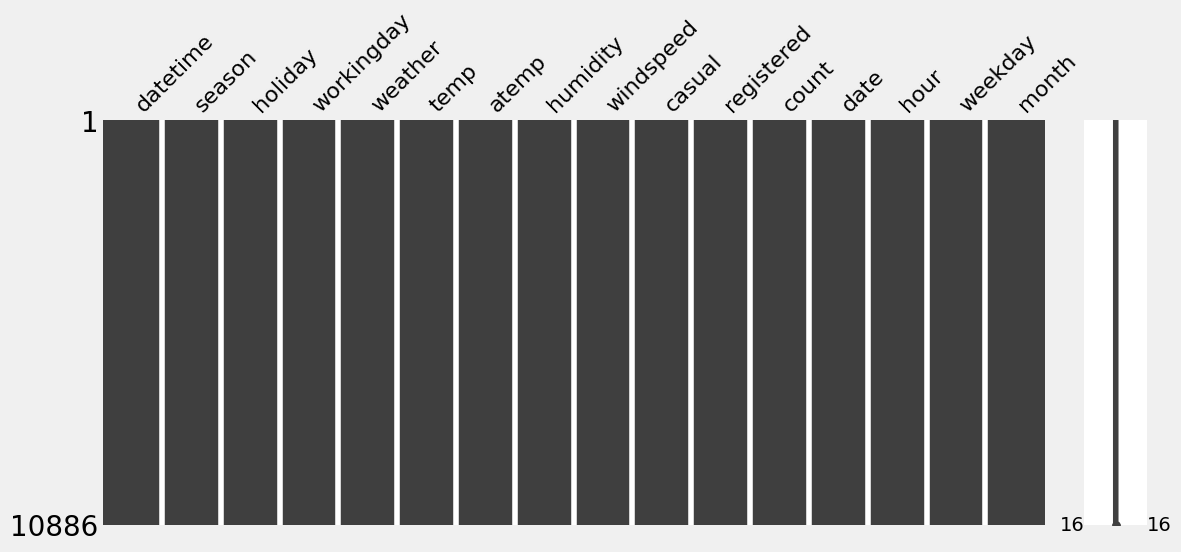

In [118]:
import missingno as msno #결측치 보는 plot
msno.matrix(df_train1,figsize=(12,5)) #결측치가 있다면 하얀색 줄이 그어짐.

In [119]:
df_train_1 = df_train1.copy() #훼손 방지
df_test_1 = df_test1.copy()

df_train_1['datetime'] = pd.to_datetime(df_train_1['datetime'])

In [120]:
type(df_train_1)

pandas.core.frame.DataFrame

In [121]:
#dataFrame 가능한 것.
df_train_1['year'] = df_train_1['datetime'].dt.year
df_train_1['month'] = df_train_1['datetime'].dt.month
df_train_1['day'] = df_train_1['datetime'].dt.day
df_train_1['hour'] = df_train_1['datetime'].dt.hour
df_train_1['minute'] = df_train_1['datetime'].dt.minute
df_train_1['second'] = df_train_1['datetime'].dt.second
#요일 데이터 - 일요일은 0
df_train_1['dayofweek'] = df_train_1['datetime'].dt.dayofweek

[Text(0, 0.5, 'hour'), Text(0.5, 1.0, 'Hour rental amount')]

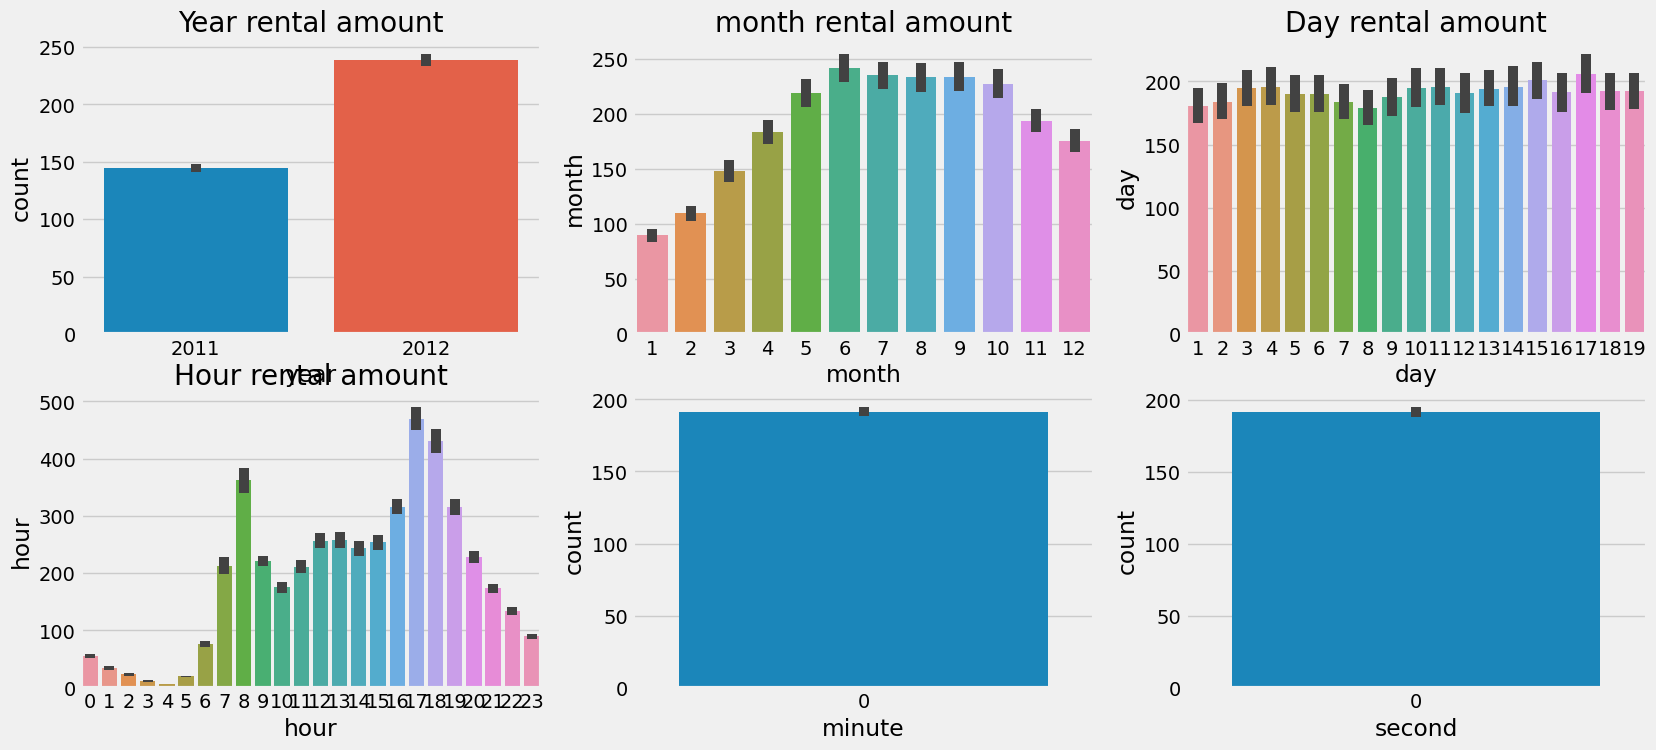

In [122]:
fig, ((ax1, ax2, ax3),(ax4, ax5,ax6))=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)

sns.barplot(data = df_train_1, x='year', y='count',ax=ax1)
sns.barplot(data = df_train_1, x='month', y='count',ax=ax2)
sns.barplot(data = df_train_1, x='day', y='count',ax=ax3)
sns.barplot(data = df_train_1, x='hour', y='count',ax=ax4)
sns.barplot(data = df_train_1, x='minute', y='count',ax=ax5)
sns.barplot(data = df_train_1, x='second', y='count',ax=ax6)

ax1.set(ylabel='count', title='Year rental amount')
ax2.set(ylabel='month', title='month rental amount')
ax3.set(ylabel='day', title='Day rental amount')
ax4.set(ylabel='hour', title='Hour rental amount')
#Day는 분석하면 안됨.-> 달마다 요일이 달라서 카운트 다 다릅니다->지표가 달라짐->분석모델 X

Month rental amount을 보면, 겨울로 분리되는 12월의 경우 초봄인 3~4월의 대여량과 비슷하다는 점이었다. 워싱턴의 날씨 변화는 우리나라의 사계절과 비슷하다. (여기서 알수 있는 점은 계절의 영향은 별로 없구나)

또한 hour 파트에서 아침7시와 저녁 6~7시의 수요량이 다른 시간대들과 비교했을 때 굉장히 높은 것을 알 수 있다. 이는 출퇴근길에 자전거를 많이 이용하는 사람들이 많다고 예측해 볼 수 있다. (주말과 나눠서 보는 것이 필요하다.) 혹시라도 뭐가 다를지 모르겠어서

일별 대여량은 1일부터 19일까지만 있고 나머지 날짜의 경우는 test데이터에 들어가있다. 따라서 이 변수는 피쳐로 사용하면 안 된다!

### Quantile, Quartile, Percentile 개념 정리

- 참고 : https://blog.eunsukim.me/posts/understanding-quantile-quartile-and-percentile

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working or nor Rental amount')]

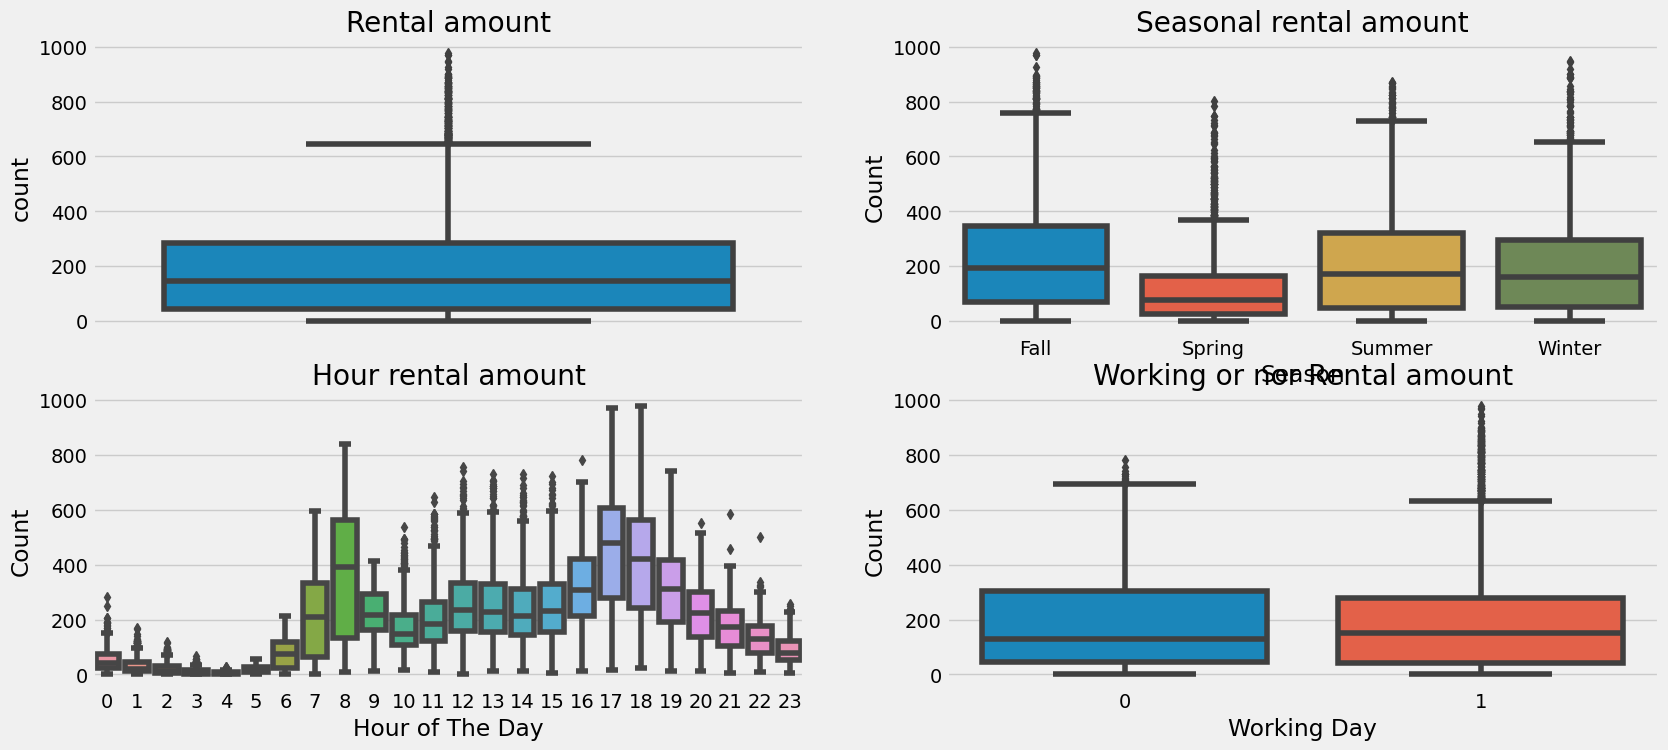

In [123]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)

sns.boxplot(data = df_train_1, y='count',orient='v',ax=axes[0][0])
sns.boxplot(data = df_train_1, y='count',x='season',orient='v',ax=axes[0][1])
sns.boxplot(data = df_train_1, y='count',x='hour',orient='v',ax=axes[1][0])
sns.boxplot(data = df_train_1, y='count',x='workingday',orient='v',ax=axes[1][1])

axes[0][0].set(ylabel='count', title='Rental amount')
axes[0][1].set(xlabel='Season',ylabel='Count', title='Seasonal rental amount')
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count', title='Hour rental amount')
axes[1][1].set(xlabel='Working Day',ylabel='Count', title='Working or nor Rental amount')

<Axes: xlabel='hour', ylabel='count'>

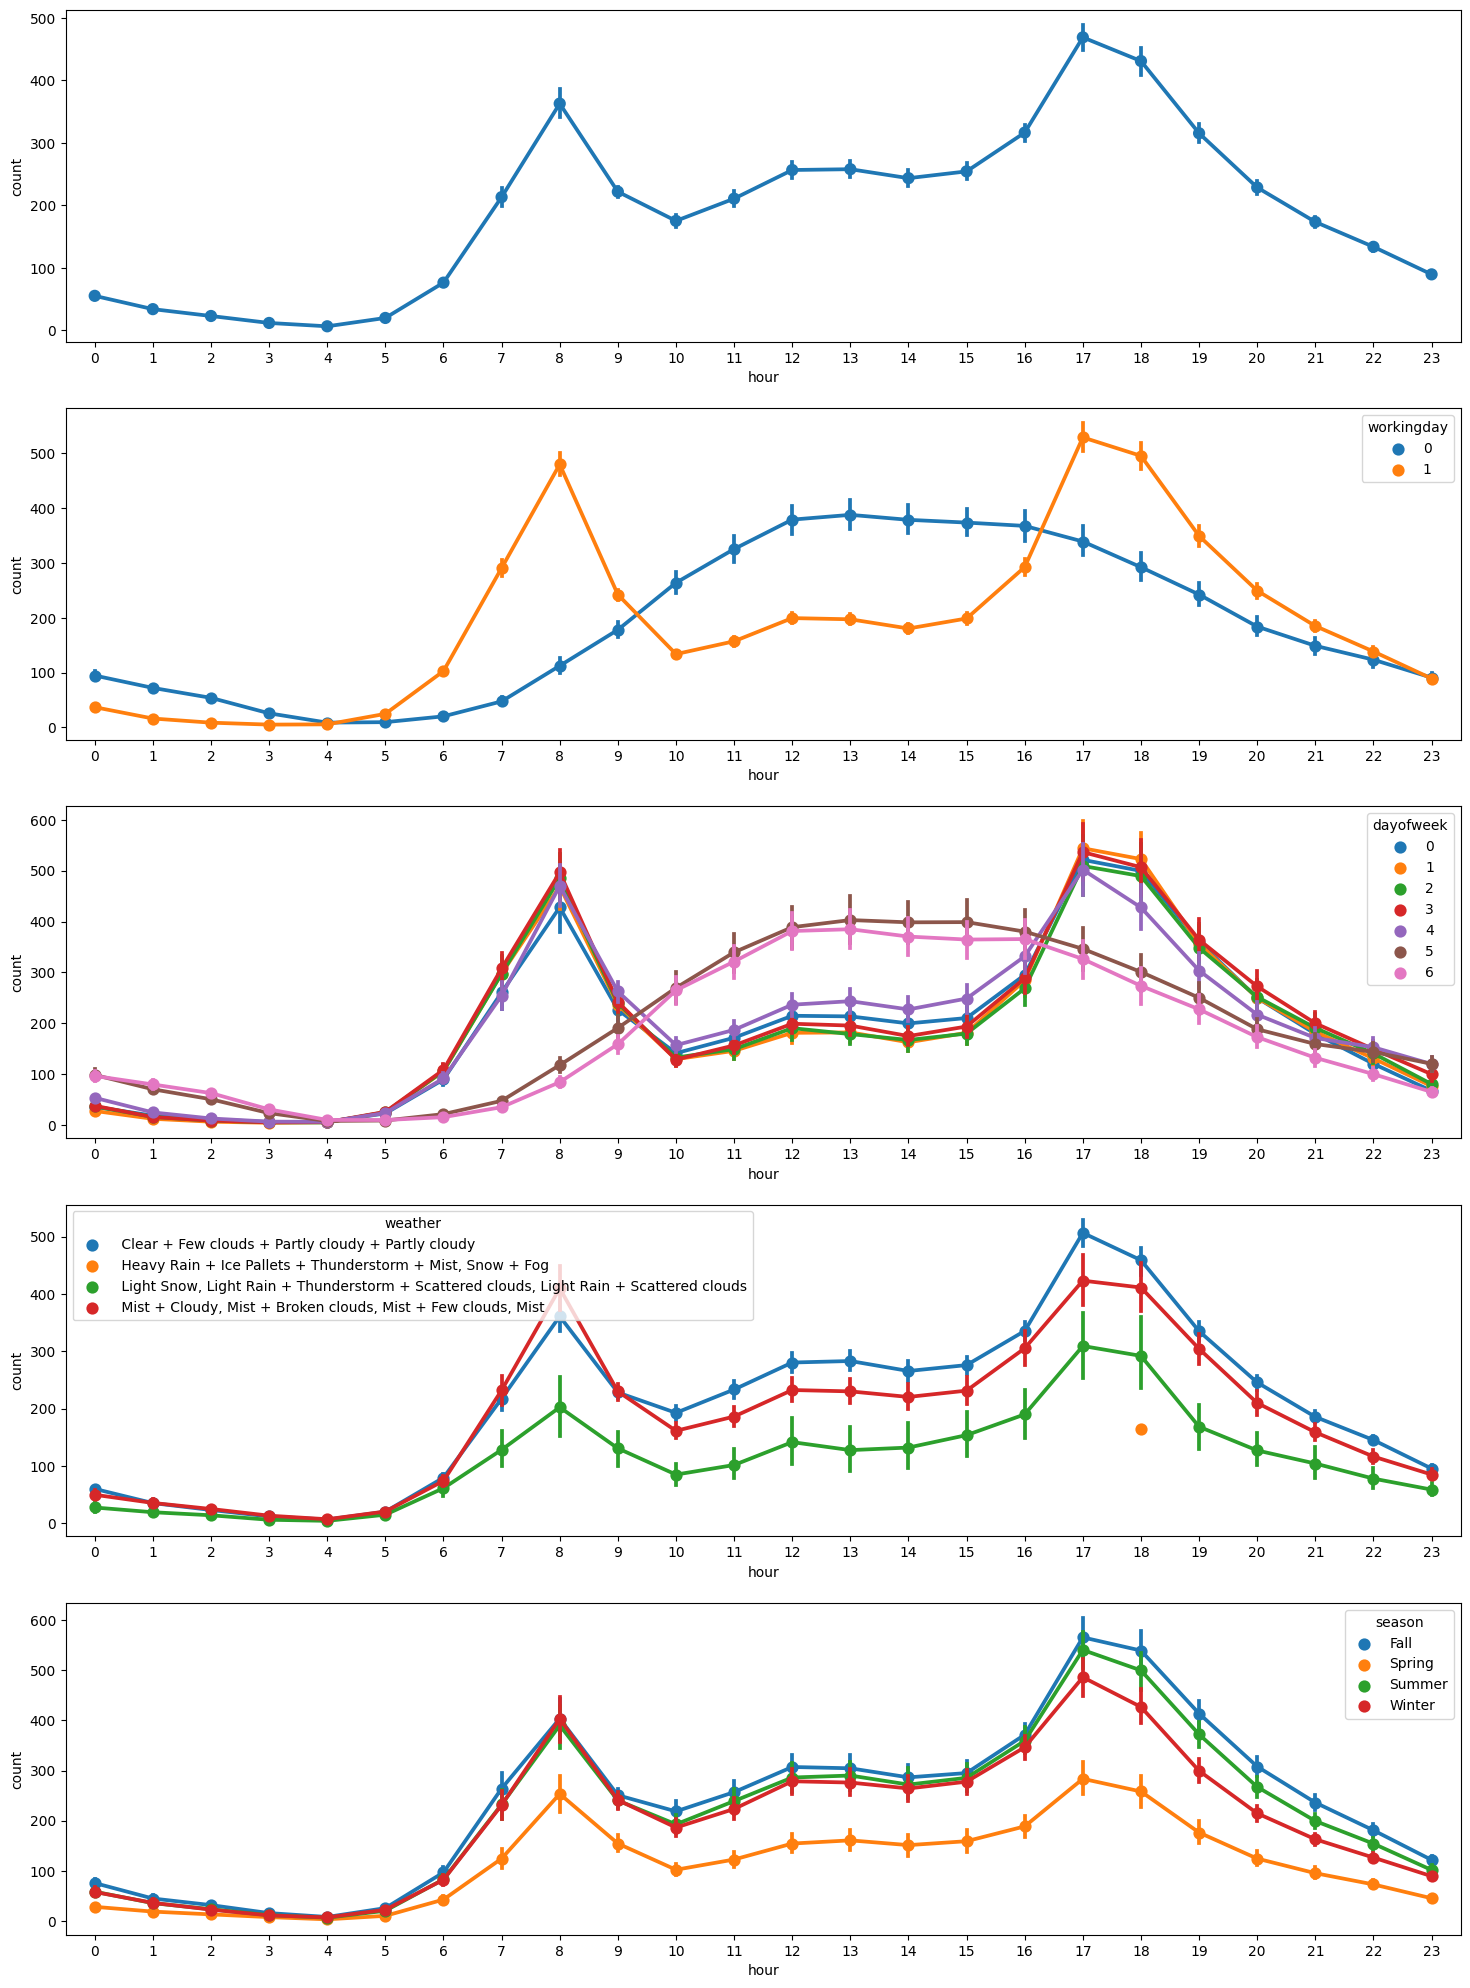

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

#꺽은선 그래프.
sns.pointplot(data =df_train_1, x='hour',y='count',ax=ax1)

sns.pointplot(data =df_train_1, x='hour',y='count',hue='workingday',ax=ax2)

sns.pointplot(data =df_train_1, x='hour',y='count',hue='dayofweek',ax=ax3)

sns.pointplot(data =df_train_1, x='hour',y='count',hue='weather',ax=ax4)

sns.pointplot(data =df_train_1, x='hour',y='count',hue='season',ax=ax5)

In [ ]:
df_train_2 = df_train_1[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt = df_train_2.corr()
# corrMatt = df_train_1.corr()
print(corrMatt)
mask = np.array(corrMatt)
#Return the indices for the upper-triangle of arr.
#상삼각행렬
mask[np.tril_indices_from(mask)]=False#상삼각행렬 False -> 하삼각행렬

                temp     atemp    casual  registered  humidity  windspeed   
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852  \
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


<Axes: >

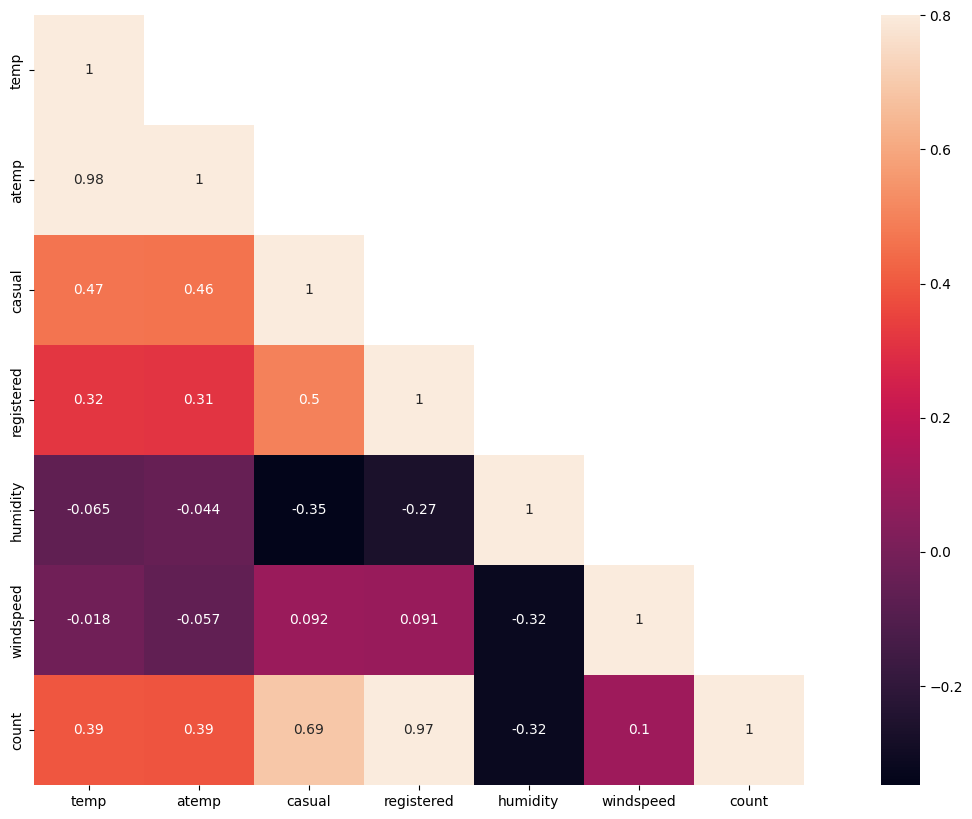

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

<Axes: xlabel='humidity', ylabel='count'>

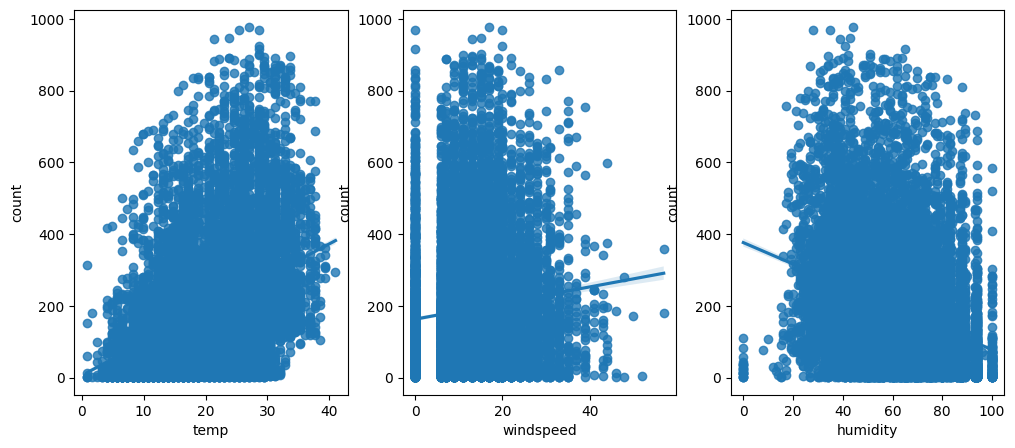

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='temp',y='count',data=df_train_1,ax=ax1)
sns.regplot(x='windspeed',y='count',data=df_train_1,ax=ax2)
sns.regplot(x='humidity',y='count',data=df_train_1,ax=ax3)

#temp,winspeed, humidity -> 회귀로 절대로 못맞침
#(상관계수가 낮음->scatter->drop하는것이 좋지 않을까?)->항상 좋을까?->실험적이여야 함.

- windspeed의 경우 0에 숫자가 몰려 있는 것으로 보아, 아마도 관측되지 않은 수치에 대해 0으로 기록된 걱이 아닐ㄴ까 추측한다.

In [ ]:
#월별 데이터 모아보기
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)
df_train_1['year_month'] = df_train_1['datetime'].apply(concatenate_year_month)
print(df_train_1.shape)
df_train_1[['datetime','year_month']].head()


(10886, 22)


datetime year_month
0 2011-01-01 00:00:00     2011-1
1 2011-01-01 01:00:00     2011-1
2 2011-01-01 02:00:00     2011-1
3 2011-01-01 03:00:00     2011-1
4 2011-01-01 04:00:00     2011-1

<Axes: xlabel='year_month', ylabel='count'>

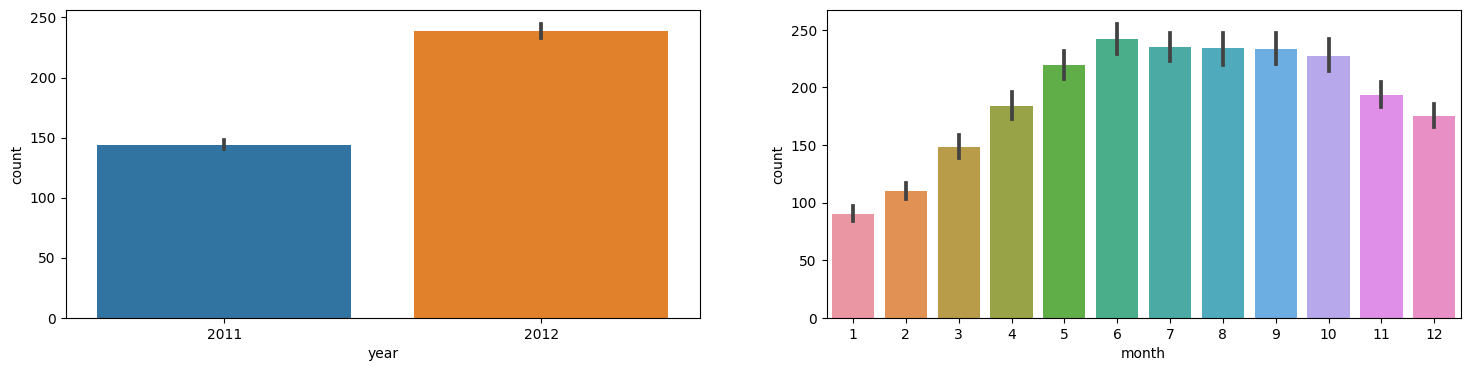

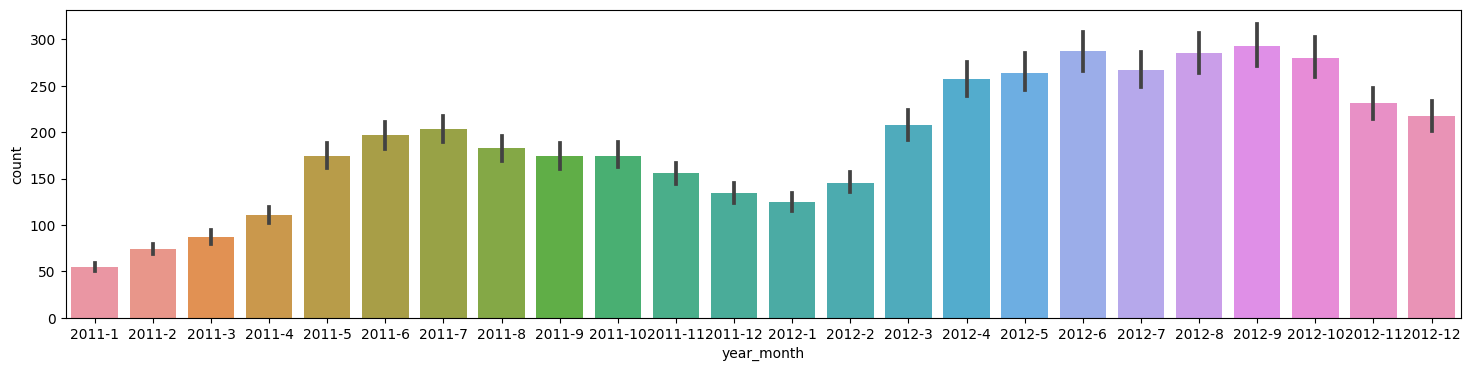

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data = df_train_1, x='year',y='count',ax=ax1)
sns.barplot(data = df_train_1, x='month',y='count',ax=ax2)

fig,ax3 = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=df_train_1,x='year_month',y='count',ax=ax3)

분석 결과 : 2011년보다 2012년에 대여량이 더 많다. ->달로 나눠도 증가하고 있습니다.

#이상치 처리

##방법1) IQR(Interquartile Range)  = Q3(75%)-Q1(25%)

$Q1-1.5*IQR ~:~$ 최소 제한선


$Q3 + 1.5*IQR ~:~$   최대 제한선



범위를 좀 더 조정

In [ ]:
#'count' 데이터에서 전체의 25%에 해당하는 데이터 조회
count_q1 = np.percentile(df_train_1['count'],25)
count_q1

#'count' 데이터에서 전체의 75%에 해당하는 데이터 조회
count_q3 = np.percentile(df_train_1['count'],75)
count_q3

# IQR = Q3-Q1
count_IQR = count_q3 - count_q1
count_IQR

# 이상치를 제외한(이상치가 아닌 구간에 있는) 데이터만 조회
df_train_1_IQR = df_train_1[(df_train_1['count']>=(count_q1 - (1.5*count_IQR))) &
                          (df_train_1['count']<=(count_q3 + (1.5*count_IQR)))]
print(df_train_1_IQR)

                 datetime  season holiday workingday   
0     2011-01-01 00:00:00  Spring       0          0  \
1     2011-01-01 01:00:00  Spring       0          0   
2     2011-01-01 02:00:00  Spring       0          0   
3     2011-01-01 03:00:00  Spring       0          0   
4     2011-01-01 04:00:00  Spring       0          0   
...                   ...     ...     ...        ...   
10881 2012-12-19 19:00:00  Winter       0          1   
10882 2012-12-19 20:00:00  Winter       0          1   
10883 2012-12-19 21:00:00  Winter       0          1   
10884 2012-12-19 22:00:00  Winter       0          1   
10885 2012-12-19 23:00:00  Winter       0          1   

                                                 weather   temp   atemp   
0       Clear + Few clouds + Partly cloudy + Partly c...   9.84  14.395  \
1       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
2       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
3       Clear + Few clouds 

## 방법2) 3-sigma, 평균 $\pm$ 3* 표준편차차

In [ ]:
df_train_1_sigma = df_train_1[np.abs(df_train_1['count'] - df_train_1['count'].mean()) < 
                              (3*df_train_1['count'].std())]
print(df_train_1_sigma)
#약 100개 정도 잃어버림                              

                 datetime  season holiday workingday   
0     2011-01-01 00:00:00  Spring       0          0  \
1     2011-01-01 01:00:00  Spring       0          0   
2     2011-01-01 02:00:00  Spring       0          0   
3     2011-01-01 03:00:00  Spring       0          0   
4     2011-01-01 04:00:00  Spring       0          0   
...                   ...     ...     ...        ...   
10881 2012-12-19 19:00:00  Winter       0          1   
10882 2012-12-19 20:00:00  Winter       0          1   
10883 2012-12-19 21:00:00  Winter       0          1   
10884 2012-12-19 22:00:00  Winter       0          1   
10885 2012-12-19 23:00:00  Winter       0          1   

                                                 weather   temp   atemp   
0       Clear + Few clouds + Partly cloudy + Partly c...   9.84  14.395  \
1       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
2       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
3       Clear + Few clouds 

#IQR을 적용했을 때의 그림

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working or nor Rental amount')]

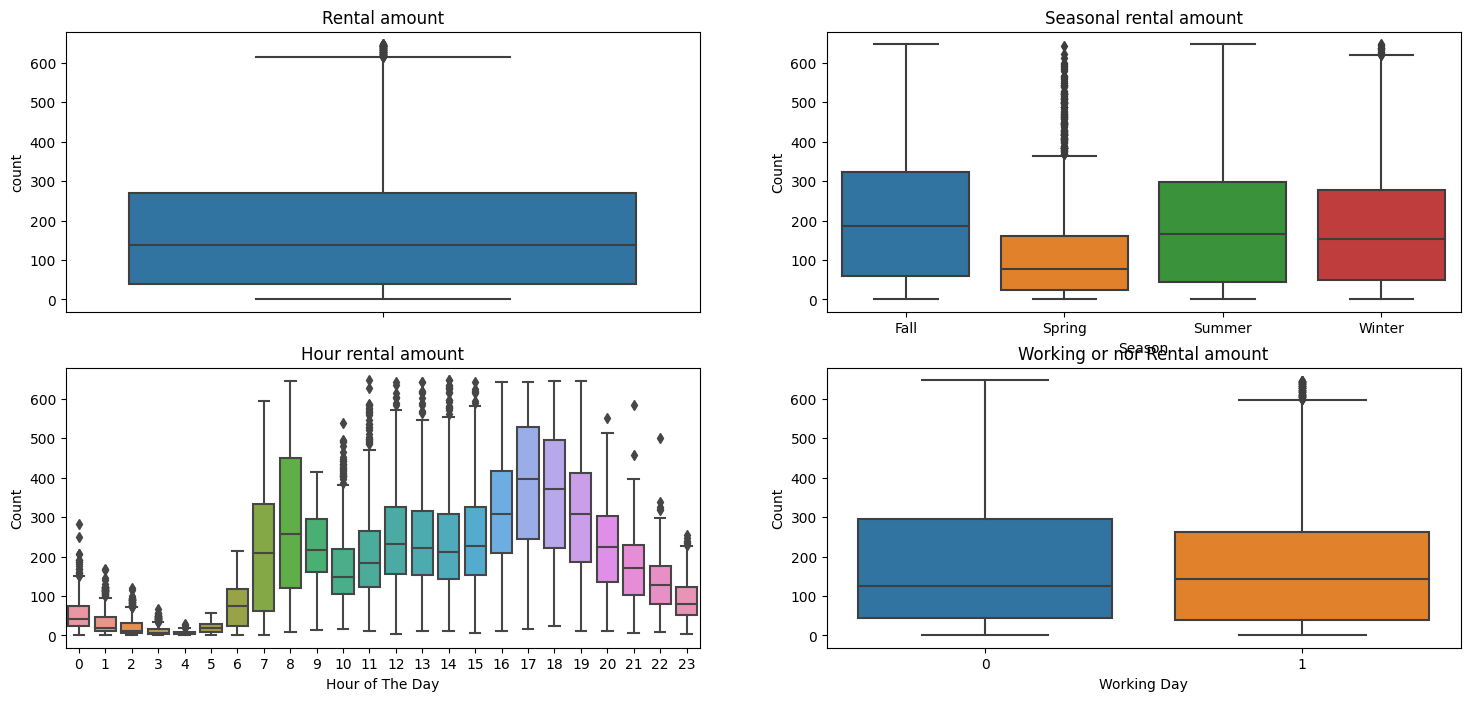

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)

sns.boxplot(data = df_train_1_IQR, y='count',orient='v',ax=axes[0][0])
sns.boxplot(data = df_train_1_IQR, y='count',x='season',orient='v',ax=axes[0][1])
sns.boxplot(data = df_train_1_IQR, y='count',x='hour',orient='v',ax=axes[1][0])
sns.boxplot(data = df_train_1_IQR, y='count',x='workingday',orient='v',ax=axes[1][1])

axes[0][0].set(ylabel='count', title='Rental amount')
axes[0][1].set(xlabel='Season',ylabel='Count', title='Seasonal rental amount')
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count', title='Hour rental amount')
axes[1][1].set(xlabel='Working Day',ylabel='Count', title='Working or nor Rental amount')

#3-sigma를 적용하였을 때

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working or nor Rental amount')]

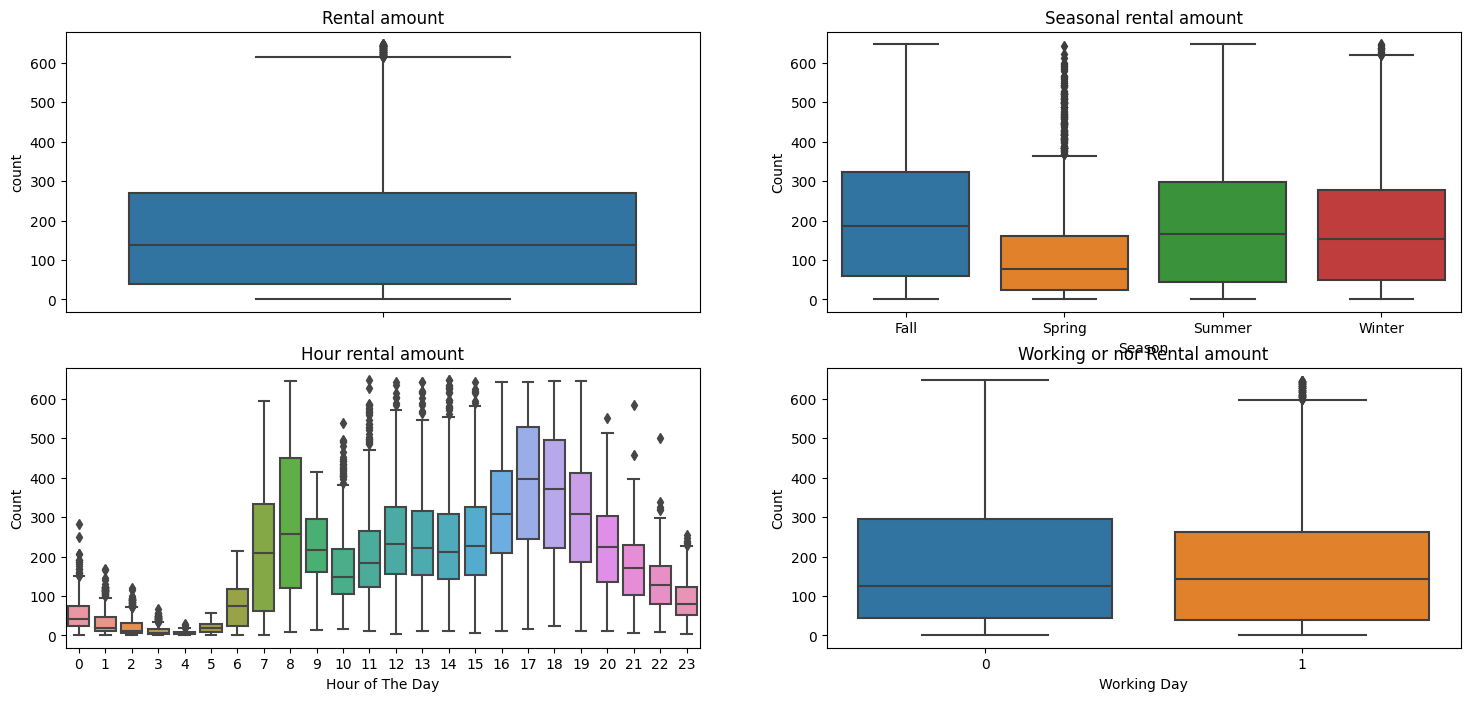

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)

sns.boxplot(data = df_train_1_IQR, y='count',orient='v',ax=axes[0][0])
sns.boxplot(data = df_train_1_IQR, y='count',x='season',orient='v',ax=axes[0][1])
sns.boxplot(data = df_train_1_IQR, y='count',x='hour',orient='v',ax=axes[1][0])
sns.boxplot(data = df_train_1_IQR, y='count',x='workingday',orient='v',ax=axes[1][1])

axes[0][0].set(ylabel='count', title='Rental amount')
axes[0][1].set(xlabel='Season',ylabel='Count', title='Seasonal rental amount')
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count', title='Hour rental amount')
axes[1][1].set(xlabel='Working Day',ylabel='Count', title='Working or nor Rental amount')

In [ ]:
dataTrain = pd.read_csv('D:/류영표강사20230501/bike-sharing-demand/train1.csv')
dataTest = pd.read_csv('D:/류영표강사20230501/bike-sharing-demand/test1.csv')

In [ ]:
data = pd.concat([dataTrain,dataTest])  # 코랩에서는 pandas를 사용하였으나, 주피터에서는 concat를 사용
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1) # 열로데이터 변환  axis=0일때는 행으로 데이터 병합

In [ ]:
data

datetime  season  holiday  workingday  weather   temp   
0      2011-01-01 00:00:00       1        0           0        1   9.84  \
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
17374  2012-12-31 19:00:00       1        0           1        2  10.66   
17375  2012-12-31 20:00:00       1        0           1        2  10.66   
17376  2012-12-31 21:00:00       1        0           1        1  10.66   
17377  2012-12-31 22:00:00       1        0           1        1  10.66   
17378  2012-12-31 23:00:00       1        0           1        1  10.66   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000     3.0        13.0   16.0  
1      13.635        80     0.0000     8.0        32.0   40.0  
2      13.635        80     0.0000     5.0        27.0   32.0  
3      14.395        75     0.0000     3.0        10.0   13.0  
4      14.395        75     0.0000     0.0         1.0    1.0  
...       ...       ...        ...     ...         ...    ...  
17374  12.880        60    11.0014     NaN         NaN    NaN  
17375  12.880        60    11.0014     NaN         NaN    NaN  
17376  12.880        60    11.0014     NaN         NaN    NaN  
17377  13.635        56     8.9981     NaN         NaN    NaN  
17378  13.635        65     8.9981     NaN         NaN    NaN  

[17379 rows x 12 columns]

- Feature Engineering

In [ ]:
data['date'] = data.datetime.apply(lambda x:x.split()[0])
data['hour'] = data.datetime.apply(lambda x:x.split()[1].split(':')[0]).astype('int')
data['year'] = data.datetime.apply(lambda x:x.split()[0].split('-')[0])
data['weekday'] = data.date.apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').weekday())
data['month'] = data.date.apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d' ).month)

- 데이터 변환.

In [ ]:
categoricalFeatureNames=['season','holiday','workingday','weather','weekday','month','year','hour']
numericalFeatureName = ['temp','humidity','windspeed','atemp']
dropFeatures = ['casual','count','datetime','date','registered']

In [ ]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype('category')

- Splitting Train and Test Data

In [ ]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=['datetime'])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=['datetime'])
datetimecol = dataTest['datetime']
yLabels = dataTrain['count']
yLabelsRegistered = dataTrain['registered']
yLabelsCasual = dataTrain['casual']

In [ ]:
dataTrain

datetime season holiday workingday weather   temp   atemp   
0      2011-01-01 00:00:00      1       0          0       1   9.84  14.395  \
1      2011-01-01 01:00:00      1       0          0       1   9.02  13.635   
2      2011-01-01 02:00:00      1       0          0       1   9.02  13.635   
3      2011-01-01 03:00:00      1       0          0       1   9.84  14.395   
4      2011-01-01 04:00:00      1       0          0       1   9.84  14.395   
...                    ...    ...     ...        ...     ...    ...     ...   
10881  2012-12-19 19:00:00      4       0          1       1  15.58  19.695   
10882  2012-12-19 20:00:00      4       0          1       1  14.76  17.425   
10883  2012-12-19 21:00:00      4       0          1       1  13.94  15.910   
10884  2012-12-19 22:00:00      4       0          1       1  13.94  17.425   
10885  2012-12-19 23:00:00      4       0          1       1  13.12  16.665   

       humidity  windspeed  casual  registered  count        date hour  year   
0            81     0.0000     3.0        13.0   16.0  2011-01-01    0  2011  \
1            80     0.0000     8.0        32.0   40.0  2011-01-01    1  2011   
2            80     0.0000     5.0        27.0   32.0  2011-01-01    2  2011   
3            75     0.0000     3.0        10.0   13.0  2011-01-01    3  2011   
4            75     0.0000     0.0         1.0    1.0  2011-01-01    4  2011   
...         ...        ...     ...         ...    ...         ...  ...   ...   
10881        50    26.0027     7.0       329.0  336.0  2012-12-19   19  2012   
10882        57    15.0013    10.0       231.0  241.0  2012-12-19   20  2012   
10883        61    15.0013     4.0       164.0  168.0  2012-12-19   21  2012   
10884        61     6.0032    12.0       117.0  129.0  2012-12-19   22  2012   
10885        66     8.9981     4.0        84.0   88.0  2012-12-19   23  2012   

      weekday month  
0           5     1  
1           5     1  
2           5     1  
3           5     1  
4           5     1  
...       ...   ...  
10881       2    12  
10882       2    12  
10883       2    12  
10884       2    12  
10885       2    12  

[10886 rows x 17 columns]

- Dropping Unncessary Variables

In [ ]:
dataTrain = dataTrain.drop(dropFeatures,axis=1)
dataTest = dataTest.drop(dropFeatures,axis=1)

RMSLE Scorer

In [ ]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

#np.nan_to_num : Replace NaN with zero and infinity with large finite numbers (default behaviour) 
#or with the numbers defined by the user using the nan, posinf and/or neginf keywords.

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
#sklearn의 mean_squared_error 이용해 RMSE계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))


#MSE, RMSE, RMSLE 계산
def evaluate_rgre(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE:{0:.3f}, RMSE:{1:.3f}, MAE:{2:.3f}'.format(rmsle_val,rmse_val,mae_val))

- Numeri으로 변환

In [ ]:
#분리를 통해 추출된 속성은 문자열 속성을 가지고 있음 따라서 숫자형 데이터로 변환해 줄 필요가 있음.
#pandas.to_numeric(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html
#errors='coerce' : 만약 숫자로 변경할 수 없는 데이터라면 기존 데이터를 지우고 NaN으로 설정하여 반환.
dataTrain['year'] = pd.to_numeric(dataTrain.year,errors='coerce')
dataTrain['month'] = pd.to_numeric(dataTrain.month,errors='coerce')
dataTrain['hour'] = pd.to_numeric(dataTrain.hour,errors='coerce')
dataTrain['weekday'] = pd.to_numeric(dataTrain.weekday,errors='coerce')

dataTrain['season'] = pd.to_numeric(dataTrain.season,errors='coerce')
dataTrain['holiday'] = pd.to_numeric(dataTrain.holiday,errors='coerce')
dataTrain['workingday'] = pd.to_numeric(dataTrain.workingday,errors='coerce')
dataTrain['weather'] = pd.to_numeric(dataTrain.weather,errors='coerce')

- Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds)))

RMSLE Value For Linear Regression:  0.9778188829547183


{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9778188678218593
CPU times: total: 1.34 s
Wall time: 1.42 s


<Axes: xlabel='param_alpha', ylabel='rmsle'>

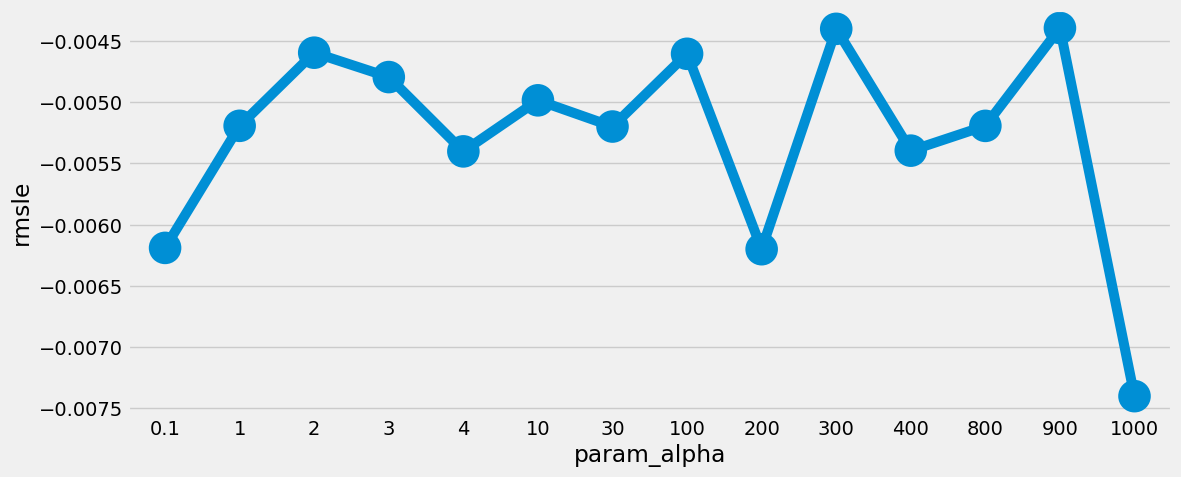

In [ ]:
%%time
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds)))
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["rmsle"] = df["mean_score_time"].apply(lambda x:-x)
sns.pointplot(data=df,x=df['param_alpha'],y="rmsle",ax=ax)

{'alpha': 0.0033333333333333335, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9779400935097249


<Axes: xlabel='param_alpha', ylabel='rmsle'>

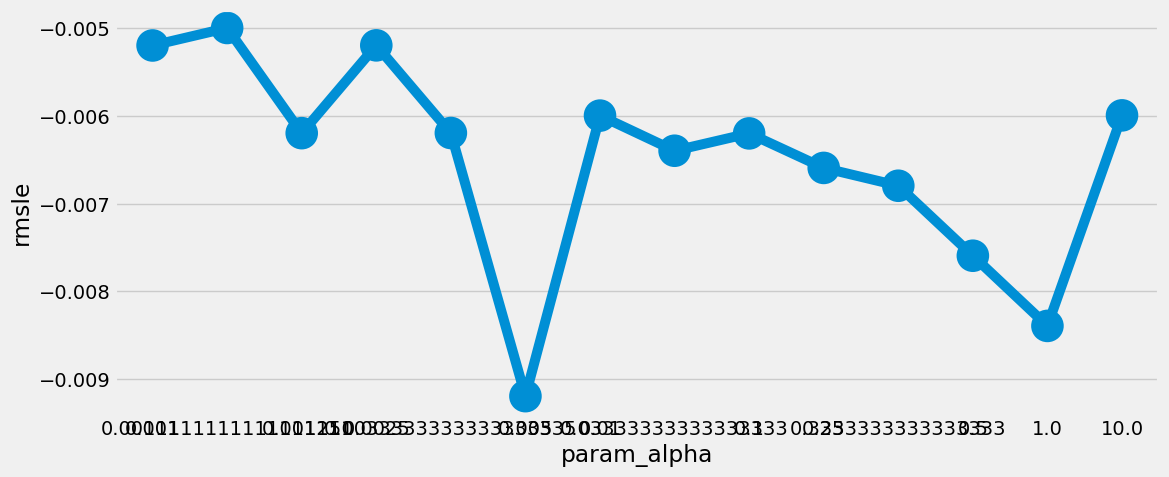

In [ ]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit( dataTrain, yLabelsLog )
preds = grid_lasso_m.predict(X= dataTrain)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds)))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["rmsle"] = df["mean_score_time"].apply(lambda x:-x)
sns.pointplot(data=df,x=df['param_alpha'],y="rmsle",ax=ax)

## Logistic Regression


## Logistic function

$g(x) = {\dfrac {e^x}{1+e^x}}$

다른 말로 시그모이드(Sigmoid)함수라고 함. 그 모양이 S자와 유사한 성질이 있음.

독립변수의 선형결학을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계기법.

앞에서 선형회귀에서 우리는 1차 선형함수를 배웠다.

$y = Wx+b$

$y = W_1X_1+W_2X_2 +\cdots + W_nX_n +b$

오즈비

${\dfrac{p}{1-p}}$

$ln{\dfrac{p}{1-p}} = WX$

${\dfrac{p}{1-p}} = e^{WX}$

양변에 역수를 취하면,

${\dfrac{1-p}{p}} = {\dfrac{1}{p}}-1 = {\dfrac{1}{e^{WX}}}$

${\dfrac{1}{p}} = {\dfrac{1}{e^{WX}}} +1 = {\dfrac
{1}{e^{WX}}}+{\dfrac{e^{WX}}{e^{WX}}} = {\dfrac{1+e^{WX}}{e^{WX}}}$

다시 한번 역수를 취하면

$p = {\dfrac {e^{WX}}{1+e^{{WX}}}}$

우리가 아는 식으로 변형하면

$p = {\dfrac{e^{WX}}{1+e^{WX}}} \cdot {\dfrac{{\dfrac {1}{e^{WX}}}}{{\dfrac{1}{e^{WX}}}}} = {\dfrac{1}{\dfrac{1}{e^{WX}}+1}} = {\dfrac {1}{e^{-WX}}}$ 

위스콘신 유방암 예측

- 총 309개의 속성과 malignant(악성), benign(양성)의 타겟값을 가지고 있다

**데이터셋 조회**

빌트인 데이터셋은 sklearn.utils.Bunch 라는 자료구조를 활용합니다.

key-value 형식으로 구성되어 있으며, 사전(dict)형 타입과 유사한 구조를 가지고 있습니다.

공통 key는 다음과 같습니다.

- data: 샘플 데이터, Numpy 배열로 이루어져 있습니다.
- target: Label 데이터, Numpy 배열로 이루어져 있습니다.
- feature_names: Feature 데이터의 이름
- target_names: Label 데이터의 이름
- DESCR: 데이터 셋의 설명
- filename: 데이터 셋의 파일 저장 위치 (csv)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [ ]:
type(cancer)

sklearn.utils.Bunch

In [ ]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
cancer.data.shape

(569, 30)

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
np.bincount(cancer.target) #빈도수

array([212, 357], dtype=int64)

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
for i,name in enumerate(cancer.feature_names): #이름에 따라서 순번을 달아놓음.
    print('%02d : %s' %(i,name))

00 : mean radius
01 : mean texture
02 : mean perimeter
03 : mean area
04 : mean smoothness
05 : mean compactness
06 : mean concavity
07 : mean concave points
08 : mean symmetry
09 : mean fractal dimension
10 : radius error
11 : texture error
12 : perimeter error
13 : area error
14 : smoothness error
15 : compactness error
16 : concavity error
17 : concave points error
18 : symmetry error
19 : fractal dimension error
20 : worst radius
21 : worst texture
22 : worst perimeter
23 : worst area
24 : worst smoothness
25 : worst compactness
26 : worst concavity
27 : worst concave points
28 : worst symmetry
29 : worst fractal dimension


In [ ]:
print('data =>',cancer.data.shape)
print('target =>',cancer.target.shape)

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

print('malignant(악성) =>', malignant.shape)
print('benign(악성) =>', benign.shape)

data => (569, 30)
target => (569,)
malignant(악성) => (212, 30)
benign(악성) => (357, 30)


In [ ]:
len(cancer.feature_names)

30

In [ ]:
len(cancer.data)

569

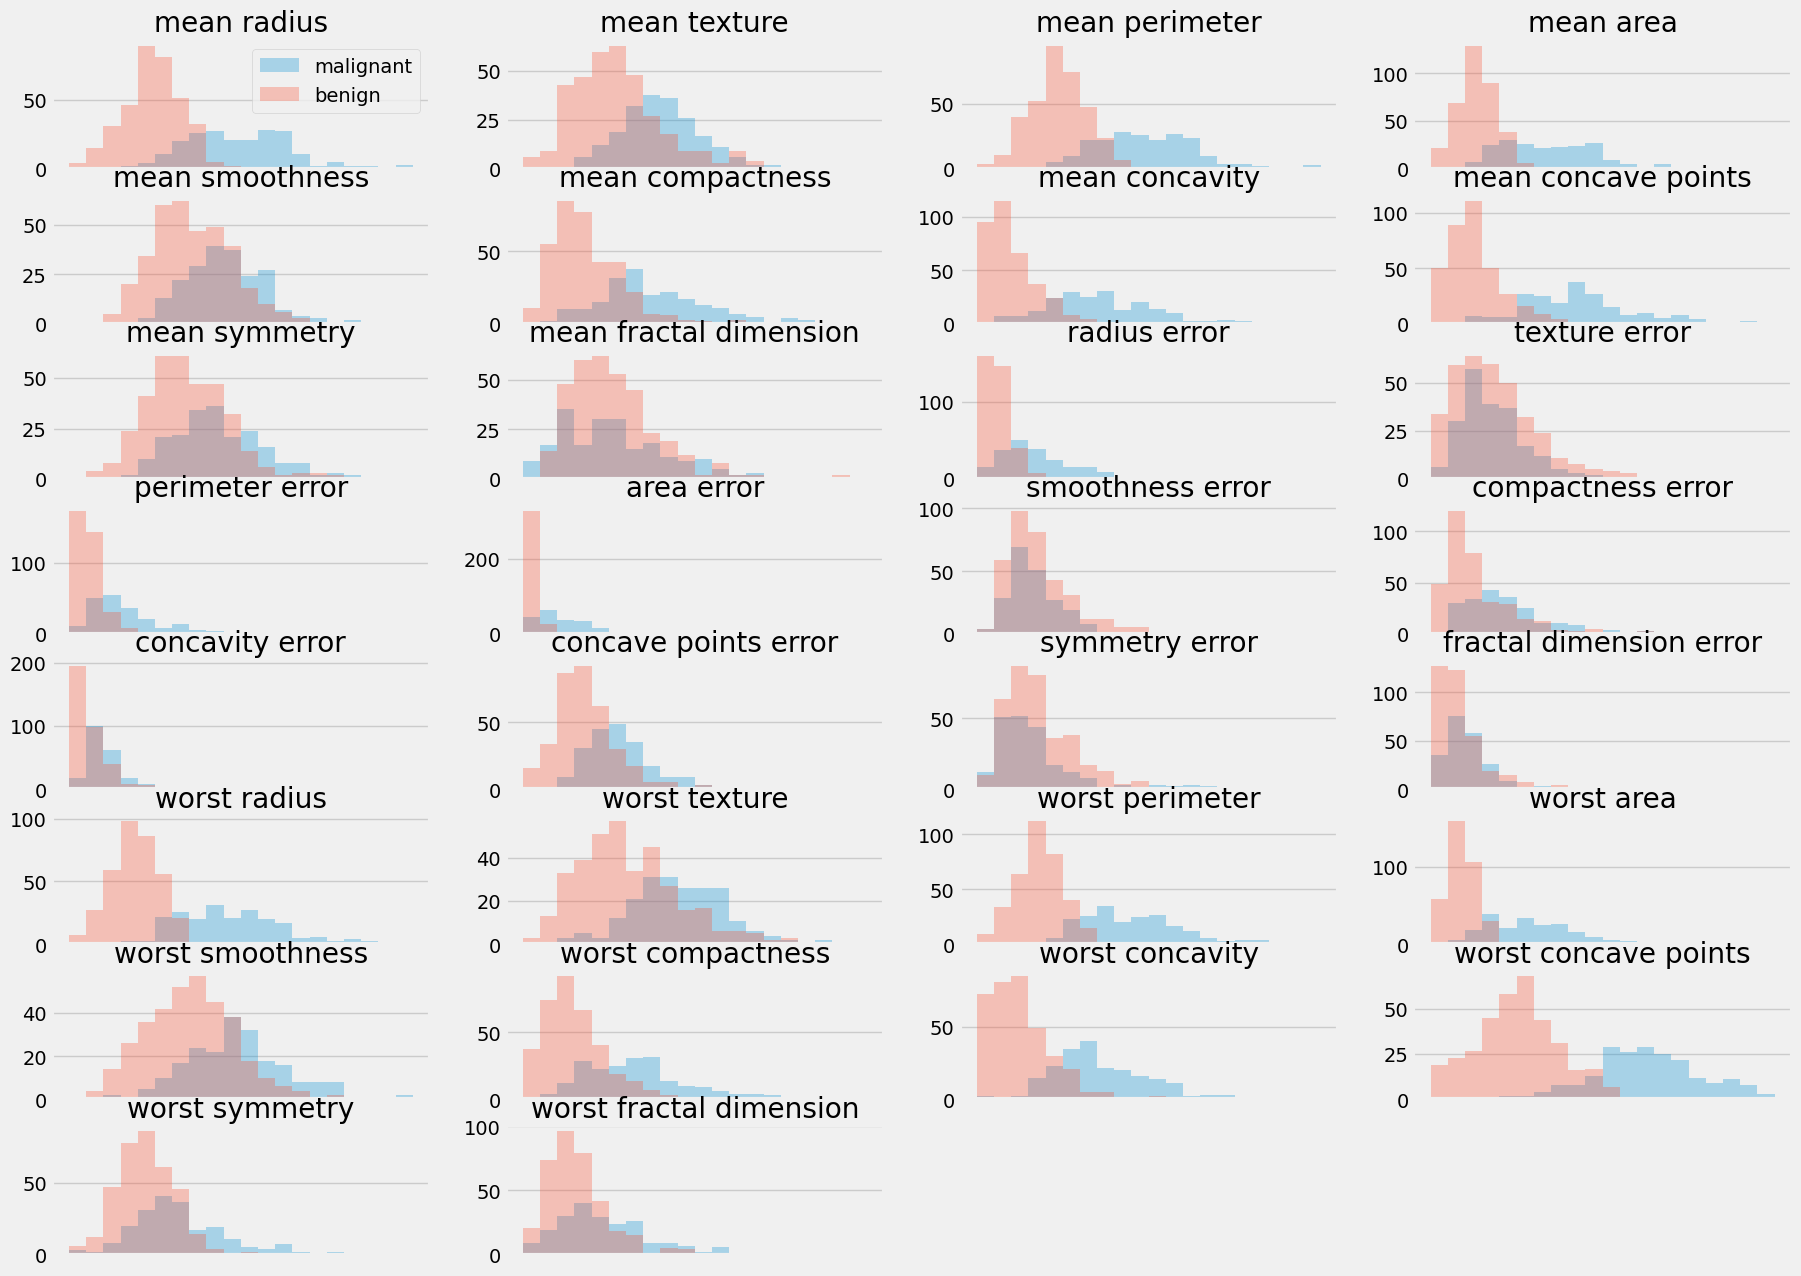

In [ ]:
plt.figure(figsize=[20,15])

for col in range(len(cancer.feature_names)):
    plt.subplot(8,4,col+1)
    _,bins = np.histogram(cancer.data[:,col],bins=20)

    plt.hist(malignant[:,col], bins=bins,alpha=0.3)
    plt.hist(benign[:,col], bins=bins,alpha=0.3)
    plt.title(cancer.feature_names[col])
    if col==0:plt.legend(cancer.target_names)
    plt.xticks([])

In [ ]:
from sklearn.linear_model import LogisticRegression

scores = []

for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,
                                                     test_size=0.2)

    model = LogisticRegression(max_iter = 5000)
    model.fit(X_train,y_train)

    score = model.score(X_test,y_test)
    scores.append(score)

print('scores =', scores)

scores = [0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9824561403508771, 0.9912280701754386, 0.9473684210526315]


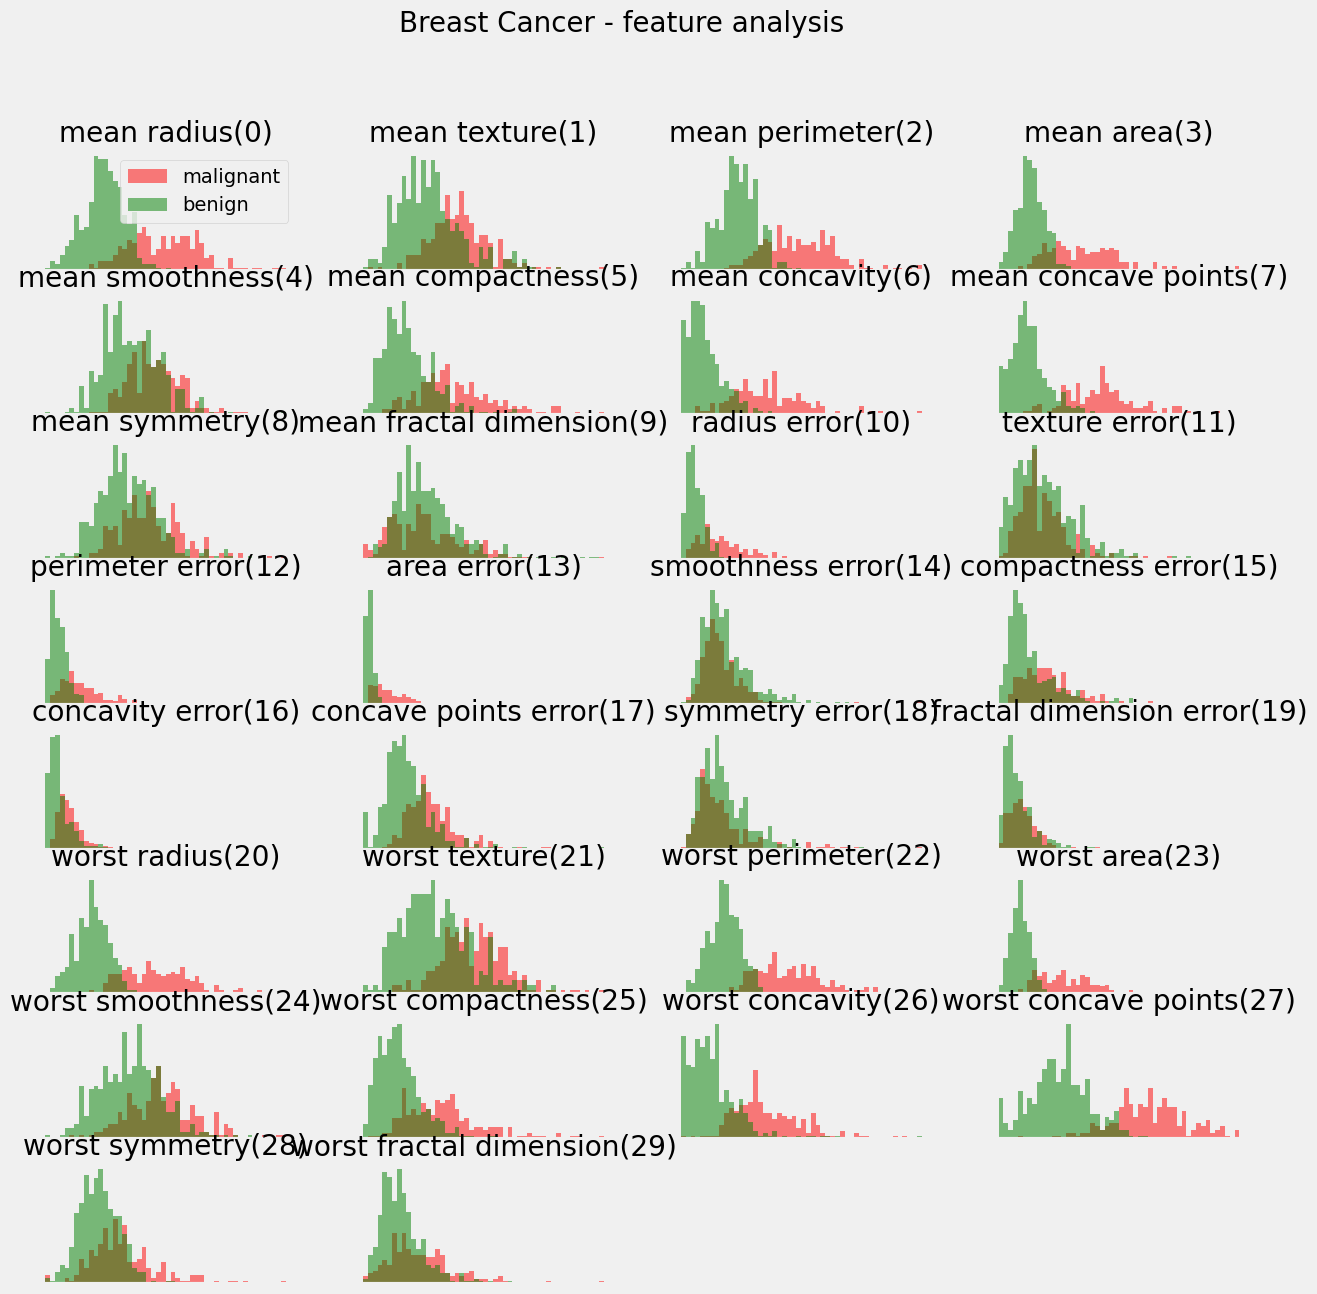

In [ ]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): # 30 features
    plt.subplot(8,4,col+1)
    _,bins=np.histogram(cancer.data[:,col],bins=50)
    plt.hist(malignant[:,col], bins=bins, alpha=0.5, label='malignant', color='red')
    plt.hist(benign[:,col], bins=bins, alpha=0.5, label='benign', color='green')
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])
    if col==0: plt.legend()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mushroom = pd.read_csv('D:/류영표강사20230501/archive/mushrooms.csv')
mushroom

class cap-shape cap-surface cap-color bruises odor gill-attachment   
0        p         x           s         n       t    p               f  \
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring   
0               c         n          k  ...                        s  \
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color   
0                         w                      w         p          w  \
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
# 라벨인코딩이라는 것은 이름으로 되어있는 것을 숫자로 혹은 그 반대로 변환하는 것입니다.
Labelencoder = LabelEncoder()
for col in mushroom.columns:
  mushroom[col] = Labelencoder.fit_transform(mushroom[col]) #column 별로 labelEncoder를 적용.

mushroom

class  cap-shape  cap-surface  cap-color  bruises  odor   
0         1          5            2          4        1     6  \
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...   
0                   1             0          1           4  ...  \
1                   1             0          0           4  ...   
2                   1             0          0           5  ...   
3                   1             0          1           5  ...   
4                   1             1          0           4  ...   
...               ...           ...        ...         ...  ...   
8119                0             0          0          11  ...   
8120                0             0          0          11  ...   
8121                0             0          0           5  ...   
8122                1             0          1           0  ...   
8123                0             0          0          11  ...   

      stalk-surface-below-ring  stalk-color-above-ring   
0                            2                       7  \
1                            2                       7   
2                            2                       7   
3                            2                       7   
4                            2                       7   
...                        ...                     ...   
8119                         2                       5   
8120                         2                       5   
8121                         2                       5   
8122                         1                       7   
8123                         2                       5   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type   
0                          7          0           2            1          4  \
1                          7          0           2            1          4   
2                          7          0           2            1          4   
3                          7          0           2            1          4   
4                          7          0           2            1          0   
...                      ...        ...         ...          ...        ...   
8119                       5          0           1            1          4   
8120                       5          0           0            1          4   
8121                       5          0           1            1          4   
8122                       7          0           2            1          0   
8123                       5          0           1            1          4   

      spore-print-color  population  habitat  
0                     2           3        5  
1                     3           2        1  
2                     3           2        3  
3                     2           3        5  
4                     3           0        1  
...                 ...         ...      ...  
8119                  0           1        2  
8120                  0           4        2  
8121                  0           1        2  
8122                  7           4        2  
8123                  4           1        2  

[8124 rows x 23 columns]

[Text(0.5, 1.0, 'Unique elements per column'),
 Text(0, 0.5, 'No of unique elements'),
 Text(0.5, 0, 'Features')]

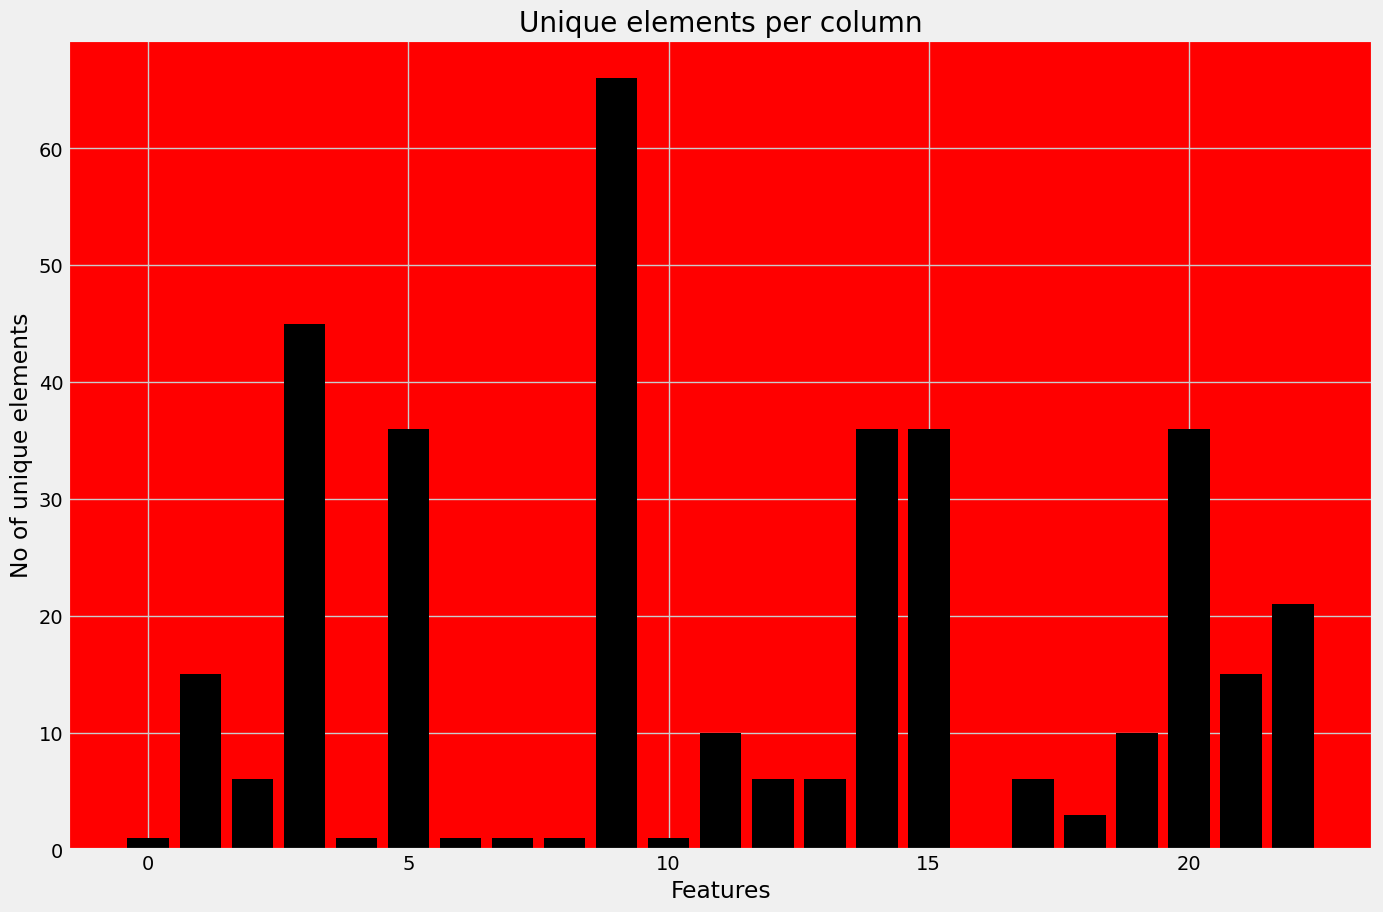

In [ ]:
count_var = []

for col in mushroom.columns:
    count_var.append(mushroom[col].unique().sum()) #Series 접근-> column으로 접근하니깐, Series와 똑같음.
    #dataframe duplicated, duplicates ->중복 제거.
size = np.arange(len(count_var))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1,facecolor='r')
ax.bar(size, count_var,color='k')
ax.set(title='Unique elements per column',
       ylabel = 'No of unique elements',
       xlabel = 'Features')

<Axes: >

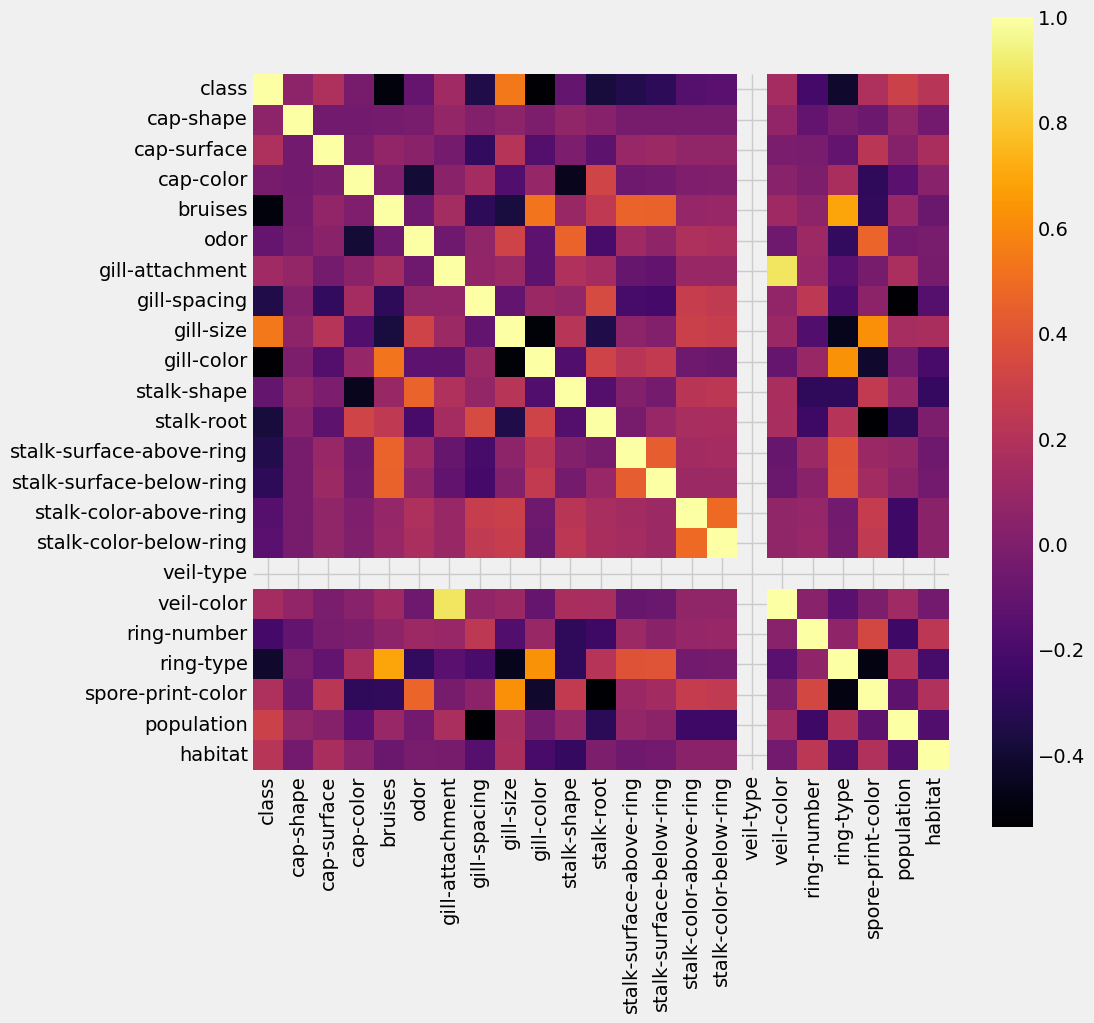

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(mushroom.corr(),cmap='inferno',square=True)

In [ ]:
target = mushroom['class']
train = mushroom.drop('class',axis = 1)

Text(0.5, 1.0, 'Class distribution')

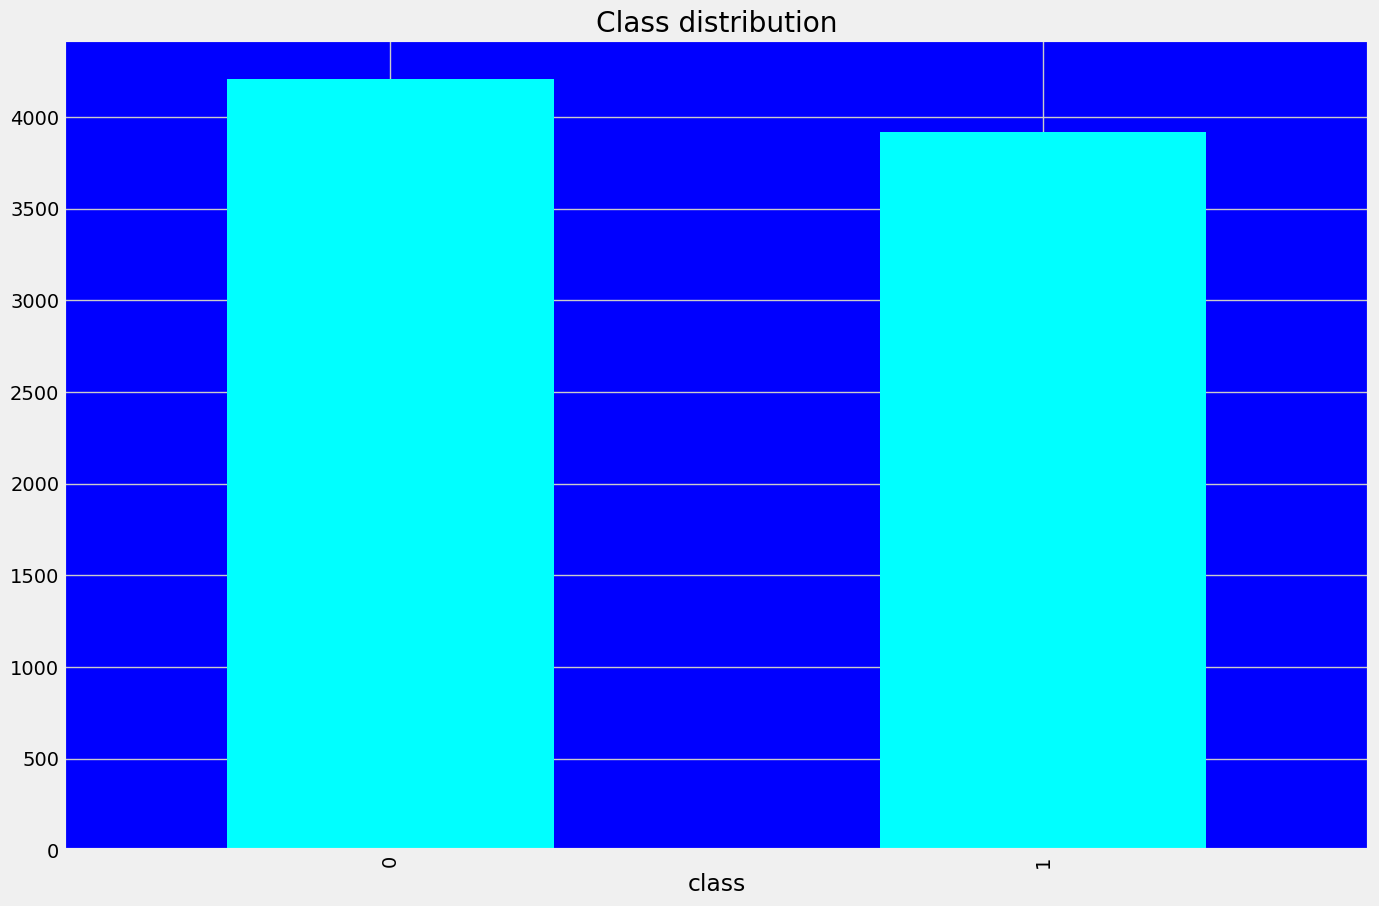

In [ ]:
fig=plt.figure(figsize = (15,10))
ax=fig.add_subplot(1,1,1,facecolor='blue')
pd.value_counts(target).plot(kind='bar', cmap = 'cool')
plt.title("Class distribution")

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train, target)
clf.score(train, target)

0.9518709995076317

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64